# **Importing Data, Libraries and Inital Checks**

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from plotnine import *
from collections import defaultdict
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the data
main = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/Airplane_Crashes_and_Fatalities_Since_1908.csv")
backup = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [ ]:
df = main
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [ ]:
# Checking the shape of the dataset
df.shape

(5268, 14)



---



# **Data Cleaning and Pre-processing**

In [ ]:
df.head(5)

index        Date   Time                            Location  \
0      0  09/17/1908  17:18                 Fort Myer, Virginia   
1      1  07/12/1912  06:30             AtlantiCity, New Jersey   
2      2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3      3  09/09/1913  18:30                  Over the North Sea   
4      4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

In [ ]:
df.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [ ]:
# Categorical Variables (qualitative / text-based or group identifiers)
cats = ['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type', 'Registration', 'cn/In', 'Summary']

# Quantitative Variables (numeric and measurable)
quants = ['Aboard', 'Fatalities', 'Ground']

In [ ]:
# Summary statistics on 'Quantitative' variables
df_quants = df.loc[:,quants]
df_cats = df.loc[:,cats]

df_quants.describe()

Aboard   Fatalities       Ground
count  5246.000000  5256.000000  5246.000000
mean     27.554518    20.068303     1.608845
std      43.076711    33.199952    53.987827
min       0.000000     0.000000     0.000000
25%       5.000000     3.000000     0.000000
50%      13.000000     9.000000     0.000000
75%      30.000000    23.000000     0.000000
max     644.000000   583.000000  2750.000000

In [ ]:
# Summary statistics on 'Categorical' variables
df_cats.describe()

Date   Time        Location  Operator Flight #     Route  \
count         5268   3049            5248      5250     1069      3561   
unique        4753   1005            4303      2476      724      3243   
top     09/11/2001  15:00  Moscow, Russia  Aeroflot        -  Training   
freq             4     32              15       179       67        81   

                Type Registration cn/In                  Summary  
count           5241         4933  4040                     4878  
unique          2446         4905  3707                     4673  
top     Douglas DC-3           49   178  Crashed during takeoff.  
freq             334            3     6                       15

In [ ]:
# Checking unique datapoints in 'Categorical' variables
for i in cats:
  print(df[i].value_counts())

Date
09/11/2001    4
08/31/1988    4
08/27/1992    4
02/28/1973    4
06/18/1972    4
             ..
01/22/1962    1
12/24/1961    1
12/21/1961    1
12/15/1961    1
03/06/1962    1
Name: count, Length: 4753, dtype: int64
Time
15:00    32
12:00    31
11:00    29
19:30    26
16:00    26
         ..
09:17     1
15:32     1
06:07     1
05:50     1
17:08     1
Name: count, Length: 1005, dtype: int64
Location
Moscow, Russia            15
Sao Paulo, Brazil         15
Rio de Janeiro, Brazil    14
Bogota, Colombia          13
Manila, Philippines       13
                          ..
Misaki Mountain, Japan     1
Angelholm, Sweden          1
Near Sora, Italy           1
Near Buca, Cameroon        1
Grand Isle, Louisana       1
Name: count, Length: 4303, dtype: int64
Operator
Aeroflot                      179
Military - U.S. Air Force     176
Air France                     70
Deutsche Lufthansa             65
United Air Lines               44
                             ... 
Star Aviation        

In [ ]:
# Checking integers available in integer 'Quantitative' variables
for i in quants:
  print(i, df[i].unique())

Aboard [  2.   5.   1.  20.  30.  41.  19.  22.  28.  23.  21.  24.  18.  nan
   8.   3.  46.  45.   7.  17.   4.   6.  52.  43.  12.  11.  10.   9.
  14.  15.  13.  16.  54.  76.  50.  25.  97.  29.  33.  37.  35.  26.
  39.  27.  31.  59.  44.  38.  49.  32.  42.  53.  40.  48.  36.  69.
  81.  34.  58.  55.  83.  65.  51.  56.  63.  47.  70.  57. 115. 129.
  66.  74.  64. 128.  80.  62. 101. 159.  67.  68.  79.  61.  99.  73.
  60.  94.  72.  78. 106.  85. 122.  77.  95. 111. 107. 132. 112.  84.
 105.  86. 118.  87. 125. 153.  91. 117. 133. 124.  98.  82.  90. 130.
  88. 127. 155. 120.  89.  92. 102. 109. 100.  75. 229.  93. 126. 164.
 218. 121. 104. 156. 174. 176. 202. 113. 182. 145. 134. 119. 149. 108.
 177. 298. 346.  96. 157. 191. 330. 188. 131. 258. 154. 644. 165. 213.
 200. 137. 262. 189. 271. 178. 257. 135. 146. 166. 168. 291. 301. 226.
 110.   0. 167. 180. 212. 394. 172. 269. 192. 116. 179. 240.  71. 148.
 274. 329. 163. 524. 103. 256. 150. 384. 183. 143. 136. 290. 259. 144.

In [ ]:
# Checking for 'Duplicates' of data set
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking 'Null' values
df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
# Replace 'NA' values with 'Unkown' in 'Type', 'Operator', and 'Summary'
df['Type'].fillna('Unknown', inplace=True)
df['Operator'].fillna('Unknown', inplace=True)
df['Summary'].fillna('Unknown', inplace=True)



---



# **Part 1**: Feature Engineering I

In [ ]:
# Convert 'Date' into datetime feature
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5268, dtype: datetime64[ns]

In [ ]:
# Create a new categorical variable 'Year' extracted from 'Date'
df['Year'] = df['Date'].dt.year

In [ ]:
# Create a new categorical variable 'Month' extracted from 'Date'
df['Month'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%b')

In [ ]:
# Define water body categories
water_bodies = {
    'Ocean': [
        'pacific ocean', 'atlantic ocean', 'indian ocean', 'southern ocean', 'arctic ocean',
        'north pacific', 'south pacific', 'north atlantic', 'south atlantic', 'pacific', 'atlantic'
    ],
    'Sea': [
        'mediterranean sea', 'caribbean sea', 'north sea', 'baltic sea', 'red sea', 'black sea',
        'caspian sea', 'aegean sea', 'adriatic sea', 'tyrrhenian sea', 'ionian sea', 'ligurian sea',
        'sea of japan', 'east china sea', 'south china sea', 'yellow sea', 'sea of okhotsk',
        'beaufort sea', 'chukchi sea', 'laptev sea', 'east siberian sea', 'kara sea', 'white sea',
        'barents sea', 'norwegian sea', 'greenland sea', 'labrador sea', 'coral sea', 'tasman sea',
        'bering sea', 'arabian sea', 'bay of bengal'
    ],
    'Channel': [
        'english channel', 'bristol channel', 'st. george channel', 'irish sea', 'strait of gibraltar',
        'strait of hormuz', 'strait of malacca', 'bering strait', 'bass strait', 'cook strait',
        'torres strait', 'denmark strait', 'dover strait', 'strait of magellan', 'strait of juan de fuca'
    ],
    'River': [
        'amazon river', 'nile river', 'mississippi river', 'missouri river', 'colorado river',
        'columbia river', 'rio grande', 'st. lawrence river', 'mackenzie river', 'yukon river',
        'congo river', 'niger river', 'zambezi river', 'yangtze river', 'yellow river', 'mekong river',
        'ganges river', 'indus river', 'brahmaputra river', 'irrawaddy river', 'salween river',
        'volga river', 'dnieper river', 'don river', 'ob river', 'yenisei river', 'lena river',
        'amur river', 'rhine river', 'danube river', 'elbe river', 'oder river', 'vistula river',
        'seine river', 'loire river', 'rhone river', 'po river', 'tiber river', 'thames river'
    ],
    'Gulf': [
        'gulf of mexico', 'persian gulf', 'gulf of alaska', 'gulf of california', 'gulf of guinea',
        'gulf of aden', 'gulf of oman', 'gulf of thailand', 'gulf of carpentaria', 'gulf of st. lawrence',
        'hudson bay', 'james bay', 'great lakes', 'lake superior', 'lake michigan', 'lake huron',
        'lake erie', 'lake ontario'
    ]
}

# Combine all water body names for quick lookup
all_water_bodies = {}
for category, bodies in water_bodies.items():
    for body in bodies:
        all_water_bodies[body] = category

# Country to Continent mapping (comprehensive)
country_to_continent = {
    # North America
    'United States': 'North America', 'USA': 'North America', 'US': 'North America',
    'Canada': 'North America', 'Mexico': 'North America', 'Guatemala': 'North America',
    'Belize': 'North America', 'Honduras': 'North America', 'El Salvador': 'North America',
    'Nicaragua': 'North America', 'Costa Rica': 'North America', 'Panama': 'North America',
    'Cuba': 'North America', 'Jamaica': 'North America', 'Haiti': 'North America',
    'Dominican Republic': 'North America', 'Puerto Rico': 'North America',
    'Trinidad and Tobago': 'North America', 'Barbados': 'North America',
    'Bahamas': 'North America', 'Bermuda': 'North America', 'Greenland': 'North America',

    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Chile': 'South America',
    'Peru': 'South America', 'Colombia': 'South America', 'Venezuela': 'South America',
    'Ecuador': 'South America', 'Bolivia': 'South America', 'Paraguay': 'South America',
    'Uruguay': 'South America', 'Guyana': 'South America', 'Suriname': 'South America',
    'French Guiana': 'South America',

    # Europe
    'United Kingdom': 'Europe', 'UK': 'Europe', 'England': 'Europe', 'Scotland': 'Europe',
    'Wales': 'Europe', 'Northern Ireland': 'Europe', 'Ireland': 'Europe',
    'France': 'Europe', 'Germany': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'Portugal': 'Europe', 'Netherlands': 'Europe', 'Belgium': 'Europe', 'Switzerland': 'Europe',
    'Austria': 'Europe', 'Poland': 'Europe', 'Czech Republic': 'Europe', 'Slovakia': 'Europe',
    'Hungary': 'Europe', 'Romania': 'Europe', 'Bulgaria': 'Europe', 'Bulgeria': 'Europe', 'Greece': 'Europe',
    'Yugoslavia': 'Europe', 'Croatia': 'Europe', 'Serbia': 'Europe', 'Bosnia': 'Europe',
    'Slovenia': 'Europe', 'Macedonia': 'Europe', 'Albania': 'Europe', 'Montenegro': 'Europe',
    'Norway': 'Europe', 'Sweden': 'Europe', 'Denmark': 'Europe', 'Finland': 'Europe',
    'Iceland': 'Europe', 'Russia': 'Europe', 'Soviet Union': 'Europe', 'USSR': 'Europe',
    'Ukraine': 'Europe', 'Belarus': 'Europe', 'Lithuania': 'Europe', 'Latvia': 'Europe',
    'Estonia': 'Europe', 'Moldova': 'Europe', 'Georgia': 'Europe', 'Armenia': 'Europe',
    'Azerbaijan': 'Europe', 'Turkey': 'Europe', 'Cyprus': 'Europe', 'Malta': 'Europe',
    'Luxembourg': 'Europe', 'Monaco': 'Europe', 'Liechtenstein': 'Europe',

    # Asia
    'China': 'Asia', 'Japan': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia',
    'Pakistan': 'Asia', 'Bangladesh': 'Asia', 'Philippines': 'Asia', 'Vietnam': 'Asia',
    'Thailand': 'Asia', 'Myanmar': 'Asia', 'Malaysia': 'Asia', 'Nepal': 'Asia',
    'Sri Lanka': 'Asia', 'Afghanistan': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia',
    'Syria': 'Asia', 'Lebanon': 'Asia', 'Jordan': 'Asia', 'Israel': 'Asia',
    'Palestine': 'Asia', 'Saudi Arabia': 'Asia', 'Yemen': 'Asia', 'Oman': 'Asia',
    'United Arab Emirates': 'Asia', 'Qatar': 'Asia', 'Bahrain': 'Asia', 'Kuwait': 'Asia',
    'Kazakhstan': 'Asia', 'Uzbekistan': 'Asia', 'Turkmenistan': 'Asia', 'Kyrgyzstan': 'Asia',
    'Tajikistan': 'Asia', 'Mongolia': 'Asia', 'North Korea': 'Asia', 'South Korea': 'Asia',
    'Taiwan': 'Asia', 'Hong Kong': 'Asia', 'Macau': 'Asia', 'Singapore': 'Asia',
    'Brunei': 'Asia', 'Cambodia': 'Asia', 'Laos': 'Asia', 'Maldives': 'Asia',
    'Bhutan': 'Asia', 'Timor-Leste': 'Asia',

    # Africa
    'Egypt': 'Africa', 'Libya': 'Africa', 'Algeria': 'Africa', 'Morocco': 'Africa',
    'Tunisia': 'Africa', 'Sudan': 'Africa', 'South Sudan': 'Africa', 'Ethiopia': 'Africa',
    'Kenya': 'Africa', 'Tanzania': 'Africa', 'Uganda': 'Africa', 'Rwanda': 'Africa',
    'Burundi': 'Africa', 'Democratic Republic of Congo': 'Africa', 'Congo': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'Mali': 'Africa', 'Burkina Faso': 'Africa', 'Ghana': 'Africa',
    'Ivory Coast': 'Africa', 'Liberia': 'Africa', 'Sierra Leone': 'Africa', 'Guinea': 'Africa',
    'Senegal': 'Africa', 'Mauritania': 'Africa', 'Gambia': 'Africa', 'Guinea-Bissau': 'Africa',
    'Cape Verde': 'Africa', 'South Africa': 'Africa', 'Namibia': 'Africa', 'Botswana': 'Africa',
    'Zimbabwe': 'Africa', 'Zambia': 'Africa', 'Malawi': 'Africa', 'Mozambique': 'Africa',
    'Madagascar': 'Africa', 'Mauritius': 'Africa', 'Seychelles': 'Africa', 'Comoros': 'Africa',
    'Djibouti': 'Africa', 'Eritrea': 'Africa', 'Somalia': 'Africa', 'Angola': 'Africa',
    'Cameroon': 'Africa', 'Equatorial Guinea': 'Africa', 'Gabon': 'Africa', 'Sao Tome and Principe': 'Africa',
    'Togo': 'Africa', 'Benin': 'Africa', 'Lesotho': 'Africa', 'Eswatini': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania', 'Papua New Guinea': 'Oceania',
    'Fiji': 'Oceania', 'Solomon Islands': 'Oceania', 'Vanuatu': 'Oceania',
    'Samoa': 'Oceania', 'Tonga': 'Oceania', 'Kiribati': 'Oceania', 'Tuvalu': 'Oceania',
    'Nauru': 'Oceania', 'Palau': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia': 'Oceania', 'Cook Islands': 'Oceania', 'Niue': 'Oceania',
    'American Samoa': 'Oceania', 'Guam': 'Oceania', 'Northern Mariana Islands': 'Oceania',
    'French Polynesia': 'Oceania', 'New Caledonia': 'Oceania', 'Wallis and Futuna': 'Oceania',

    # Antarctica
    'Antarctica': 'Antarctica'
}

# State/Province mappings
us_states = {
    'Alabama': 'United States', 'Alaska': 'United States', 'Arizona': 'United States', 'Arkansas': 'United States',
    'California': 'United States', 'Colorado': 'United States', 'Connecticut': 'United States', 'Delaware': 'United States',
    'Florida': 'United States', 'Georgia': 'United States', 'Hawaii': 'United States', 'Idaho': 'United States',
    'Illinois': 'United States', 'Indiana': 'United States', 'Iowa': 'United States', 'Kansas': 'United States',
    'Kentucky': 'United States', 'Louisiana': 'United States', 'Maine': 'United States', 'Maryland': 'United States',
    'Massachusetts': 'United States', 'Michigan': 'United States', 'Minnesota': 'United States', 'Mississippi': 'United States',
    'Missouri': 'United States', 'Montana': 'United States', 'Nebraska': 'United States', 'Nevada': 'United States',
    'New Hampshire': 'United States', 'New Jersey': 'United States', 'New Mexico': 'United States', 'New York': 'United States',
    'North Carolina': 'United States', 'North Dakota': 'United States', 'Ohio': 'United States', 'Oklahoma': 'United States',
    'Oregon': 'United States', 'Pennsylvania': 'United States', 'Rhode Island': 'United States', 'South Carolina': 'United States',
    'South Dakota': 'United States', 'Tennessee': 'United States', 'Texas': 'United States', 'Utah': 'United States',
    'Vermont': 'United States', 'Virginia': 'United States', 'Washington': 'United States', 'West Virginia': 'United States',
    'Wisconsin': 'United States', 'Wyoming': 'United States'
}

canadian_provinces = {
    'Alberta': 'Canada', 'British Columbia': 'Canada', 'Manitoba': 'Canada', 'New Brunswick': 'Canada',
    'Newfoundland and Labrador': 'Canada', 'Northwest Territories': 'Canada', 'Nova Scotia': 'Canada',
    'Nunavut': 'Canada', 'Ontario': 'Canada', 'Prince Edward Island': 'Canada', 'Quebec': 'Canada',
    'Saskatchewan': 'Canada', 'Yukon': 'Canada'
}

# Water body to continent mapping for seas/rivers/channels
water_to_continent = {
    'Mediterranean Sea': 'Europe', 'North Sea': 'Europe', 'Baltic Sea': 'Europe', 'Black Sea': 'Europe',
    'Caspian Sea': 'Asia', 'Red Sea': 'Africa', 'Arabian Sea': 'Asia', 'Bay of Bengal': 'Asia',
    'Sea of Japan': 'Asia', 'East China Sea': 'Asia', 'South China Sea': 'Asia', 'Yellow Sea': 'Asia',
    'Caribbean Sea': 'North America', 'Gulf of Mexico': 'North America', 'Hudson Bay': 'North America',
    'Great Lakes': 'North America', 'English Channel': 'Europe', 'Irish Sea': 'Europe',
    'Coral Sea': 'Oceania', 'Tasman Sea': 'Oceania'
}

def analyze_location(location):
    """
    Analyze location and return detailed geographical information
    Returns: dict with all required information
    """
    if pd.isna(location):
        return create_unknown_result()

    location = str(location).strip()
    location_lower = location.lower()

    # Check if it's a water body
    water_info = check_water_body(location_lower)
    if water_info['is_water']:
        return water_info

    # If not water, process as land location
    return process_land_location(location)

def check_water_body(location_lower):
    """Check if location is a water body and categorize it"""

    # Check for specific water bodies
    for water_name, category in all_water_bodies.items():
        if water_name in location_lower:
            result = {
                'location_type': 'Watery',
                'is_water': True,
                'water_body_type': category,
                'water_body_name': water_name.title(),
                'continent': 'Unknown',
                'country': 'Unknown',
                'state_province': 'Unknown'
            }

            # For non-ocean water bodies, try to determine continent/country
            if category != 'Ocean':
                continent, country, state = get_water_body_location(water_name, location_lower)
                result['continent'] = continent
                result['country'] = country
                result['state_province'] = state

            return result

    # Check for general water indicators
    water_indicators = ['ocean', 'sea', 'gulf', 'bay', 'strait', 'channel', 'sound', 'river', 'lake']
    for indicator in water_indicators:
        if indicator in location_lower:
            # Try to extract water body name and type
            water_type = categorize_water_type(indicator)
            water_name = extract_water_name(location_lower, indicator)

            result = {
                'location_type': 'Watery',
                'is_water': True,
                'water_body_type': water_type,
                'water_body_name': water_name,
                'continent': 'Unknown',
                'country': 'Unknown',
                'state_province': 'Unknown'
            }

            if water_type != 'Ocean':
                continent, country, state = infer_water_location_from_context(location_lower)
                result['continent'] = continent
                result['country'] = country
                result['state_province'] = state

            return result

    return {'is_water': False}

def categorize_water_type(indicator):
    """Categorize water body type based on indicator"""
    if indicator in ['ocean']:
        return 'Ocean'
    elif indicator in ['sea']:
        return 'Sea'
    elif indicator in ['channel', 'strait']:
        return 'Channel'
    elif indicator in ['river']:
        return 'River'
    elif indicator in ['gulf', 'bay', 'sound', 'lake']:
        return 'Gulf'
    return 'Unknown'

def extract_water_name(location_lower, indicator):
    """Extract water body name from location"""
    words = location_lower.split()
    for i, word in enumerate(words):
        if indicator in word:
            # Try to get the name before the indicator
            if i > 0:
                return ' '.join(words[max(0, i-1):i+1]).title()
            else:
                return word.title()
    return 'Unknown'

def get_water_body_location(water_name, location_lower):
    """Get continent/country/state for known water bodies"""
    # Check predefined mappings
    water_name_title = water_name.title()
    if water_name_title in water_to_continent:
        continent = water_to_continent[water_name_title]
        return continent, 'Unknown', 'Unknown'

    # Try to infer from context
    return infer_water_location_from_context(location_lower)

def infer_water_location_from_context(location_lower):
    """Infer water body location from surrounding context"""
    # Look for country/state names in the location string
    for country, continent in country_to_continent.items():
        if country.lower() in location_lower:
            return continent, country, 'Unknown'

    for state, country in us_states.items():
        if state.lower() in location_lower:
            return 'North America', country, state

    for province, country in canadian_provinces.items():
        if province.lower() in location_lower:
            return 'North America', country, province

    return 'Unknown', 'Unknown', 'Unknown'

def process_land_location(location):
    """Process land-based location"""
    parts = [part.strip() for part in location.split(',')]

    # Clean up common prefixes
    parts = [re.sub(r'^(near|off|over)\s+', '', part, flags=re.IGNORECASE) for part in parts]

    continent = 'Unknown'
    country = 'Unknown'
    state_province = 'Unknown'

    if len(parts) > 3:
        # Format: Street, City, State/Province, Country
        state_province = parts[1]
        country = standardize_country_name(parts[3])
        continent = get_continent_from_country(country)
    elif len(parts) == 3:
        # Format: City, State/Province, Country
        state_province = parts[1]
        country = standardize_country_name(parts[2])
        continent = get_continent_from_country(country)
    elif len(parts) == 2:
        # Format: City, Country OR State, Country
        potential_country = standardize_country_name(parts[1])
        if potential_country in country_to_continent:
            country = potential_country
            continent = country_to_continent[country]
        else:
            # Might be state/province
            state_province = parts[1]
            country = get_country_from_state(state_province)
            continent = get_continent_from_country(country)
    elif len(parts) == 1:
        # Single location
        single_loc = parts[0]
        country = get_country_from_state(single_loc)
        if country != 'Unknown':
            state_province = single_loc
            continent = get_continent_from_country(country)
        else:
            # Try as country
            country = standardize_country_name(single_loc)
            continent = get_continent_from_country(country)

    return {
        'location_type': 'Land',
        'is_water': False,
        'water_body_type': 'Unknown',
        'water_body_name': 'Unknown',
        'continent': continent,
        'country': country,
        'state_province': state_province
    }

def standardize_country_name(country):
    """Standardize country names"""
    country = country.strip()
    country_lower = country.lower()

    if country_lower in ['united states', 'usa', 'us']:
        return 'United States'
    elif country_lower in ['united kingdom', 'uk', 'britain']:
        return 'United Kingdom'
    elif country_lower in ['soviet union', 'ussr']:
        return 'Soviet Union'

    # Check if it matches any known country
    for known_country in country_to_continent.keys():
        if known_country.lower() == country_lower:
            return known_country

    return country.title()

def get_country_from_state(state_province):
    """Get country from state/province name"""
    state_province = state_province.strip().title()

    if state_province in us_states:
        return us_states[state_province]
    elif state_province in canadian_provinces:
        return canadian_provinces[state_province]

    return 'Unknown'

def get_continent_from_country(country):
    """Get continent from country name"""
    if country in country_to_continent:
        return country_to_continent[country]
    return 'Unknown'

def create_unknown_result():
    """Create result for unknown locations"""
    return {
        'location_type': 'Unknown',
        'is_water': False,
        'water_body_type': 'Unknown',
        'water_body_name': 'Unknown',
        'continent': 'Unknown',
        'country': 'Unknown',
        'state_province': 'Unknown'
    }

# Apply the analysis to all locations
print("Analyzing location data...")
location_analysis = df['Location'].apply(analyze_location)

# Extract results into separate columns
df['LocationType'] = [result['location_type'] for result in location_analysis]
df['WaterBodyType'] = [result['water_body_type'] for result in location_analysis]
df['WaterBodyName'] = [result['water_body_name'] for result in location_analysis]
df['Continent'] = [result['continent'] for result in location_analysis]
df['Country'] = [result['country'] for result in location_analysis]
df['FederalSubject'] = [result['state_province'] for result in location_analysis]

Analyzing location data...


| Time Duration | DayPeriod |
| ------------- |---------- |
| 05:00 – 11:59 | Morning   |
| 12:00 – 16:59 | Afternoon |
| 17:00 – 20:59 | Evening   |
| 21:00 – 04:59 | Night     |


In [ ]:
# Create 'DayPeriod' from 'Time'

def get_day_period(time_str):
    try:
        time_str = str(time_str).strip().lower().replace('.', '')
        if time_str in ['nan', '', 'unknown']:
            return 'Unknown'

        # Standardize time (e.g., 5:05 becomes 05:05)
        if len(time_str.split(':')[0]) == 1:
            time_str = '0' + time_str

        # Parse to hour
        hour = int(time_str.split(':')[0])

        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'
    except:
        return 'Unknown'

df['DayPeriod'] = df['Time'].apply(get_day_period)



---



# **Part 2**: Changing Data Type

In [ ]:
# Convert 'Aboard', 'Fatalities', 'Ground' into numeric
cols_to_convert = ['Aboard', 'Fatalities', 'Ground']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')



---



# **Part 3**: Dropping Irrelevant Columns

| Column         | Reason to Drop                         |
| -------------- | ------------------------------------------------------------|
| **index**      | Just a row number (auto-generated by pandas) — no analytical value|
| **Flight #**   | Mostly unique identifiers; no analytical patterns; not used in survival study    |
| **cn/In**        | Aircraft serial/construction number — unlikely to generalize or be interpretable |
| **Registration** | Aircraft registration number — highly unique and not helpful for trends          |
| **Route**        | Too unstructured for effective grouping; often missing or inconsistent           |
| **Date**         | Redundant after **Year** extraction |
| **Time**         | High missingness; already binned into **DayPeriod** |
| **Location**     | Messy and inconsistent; **Country/Continent** gives clean versions |

In [ ]:
df.drop(columns=[
    'index',
    'Flight #',
    'Route',
    'Registration',
    'cn/In',
    'Date',
    'Time',
    'Location'
], inplace=True)


In [ ]:
df = df[['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country',
         'WaterBodyType', 'WaterBodyName', 'FederalSubject', 'Aboard', 'Fatalities', 'Ground', 'Summary']]
df

Year Month DayPeriod                              Type  \
0     1908   Sep   Evening                  Wright Flyer III   
1     1912   Jul   Morning                         Dirigible   
2     1913   Aug   Unknown                  Curtiss seaplane   
3     1913   Sep   Evening            Zeppelin L-1 (airship)   
4     1913   Oct   Morning            Zeppelin L-2 (airship)   
...    ...   ...       ...                               ...   
5263  2009   May   Morning           Lockheed C-130 Hercules   
5264  2009   May   Unknown                     Antonov An-26   
5265  2009   Jun     Night                   Airbus A330-203   
5266  2009   Jun   Morning  Britten-Norman BN-2A-27 Islander   
5267  2009   Jun   Unknown                     Antonov An-32   

                             Operator LocationType      Continent  \
0                Military - U.S. Army         Land  North America   
1                Military - U.S. Navy       Watery        Unknown   
2                             Private         Land  North America   
3              Military - German Navy       Watery         Europe   
4              Military - German Navy         Land         Europe   
...                               ...          ...            ...   
5263  Military - Indonesian Air Force         Land           Asia   
5264                      Service Air         Land        Unknown   
5265                       Air France       Watery        Unknown   
5266                       Strait Air         Land  North America   
5267      Military - Indian Air Force         Land           Asia   

            Country WaterBodyType  WaterBodyName         FederalSubject  \
0     United States       Unknown        Unknown               Virginia   
1           Unknown         Ocean       Atlantic                Unknown   
2            Canada       Unknown        Unknown       British Columbia   
3           Unknown           Sea      North Sea                Unknown   
4           Germany       Unknown        Unknown                Unknown   
...             ...           ...            ...                    ...   
5263      Indonesia       Unknown        Unknown                Unknown   
5264        Unknown       Unknown        Unknown  DemocratiRepubliCongo   
5265        Unknown         Ocean  Atlantiocean,                Unknown   
5266         Canada       Unknown        Unknown           Newfoundland   
5267          India       Unknown        Unknown                Unknown   

      Aboard  Fatalities  Ground  \
0          2           1       0   
1          5           5       0   
2          1           1       0   
3         20          14       0   
4         30          30       0   
...      ...         ...     ...   
5263     112          98       2   
5264       4           4    <NA>   
5265     228         228       0   
5266       1           1       0   
5267      13          13       0   

                                                Summary  
0     During a demonstration flight, a U.S. Army fly...  
1     First U.S. dirigible Akron exploded just offsh...  
2     The first fatal airplane accident in Canada oc...  
3     The airship flew into a thunderstorm and encou...  
4     Hydrogen gas which was being vented was sucked...  
...                                                 ...  
5263  While on approach, the military transport cras...  
5264  The cargo plane crashed while on approach to I...  
5265  The Airbus went missing over the AtlantiOcean ...  
5266  The air ambulance crashed into hills while att...  
5267  The military transport went missing while en r...  

[5268 rows x 15 columns]

In [ ]:
# Exclude rows with missing values
df = df.dropna(subset=['Aboard', 'Fatalities', 'Ground'])

In [ ]:
# Checking the shape of the updated dataset
df.shape

(5236, 15)



---



# **Part 4**: Text Mining

Extract Summary-Based Features

In [ ]:
# Categorizes the primary cause of the accident (Mechanical, Human Error, Weather, External, Unknown)
def extract_cause_category(summary):
    summary_lower = summary.lower()
    if 'engine failure' in summary_lower or 'mechanical failure' in summary_lower:
        return 'Mechanical'
    elif 'pilot error' in summary_lower or 'crew error' in summary_lower:
        return 'Human Error'
    elif 'weather' in summary_lower or 'fog' in summary_lower or 'rain' in summary_lower or 'snow' in summary_lower or 'thunderstorm' in summary_lower:
        return 'Weather'
    elif 'shot down' in summary_lower or 'collision' in summary_lower:
        return 'External'
    else:
        return 'Unknown'

# Identifies the weather condition during the accident (Fog, Rain, Snow, Thunderstorm, Clear, Unknown)
def extract_weather_condition(summary):
    summary_lower = summary.lower()
    if 'fog' in summary_lower:
        return 'Fog'
    elif 'rain' in summary_lower:
        return 'Rain'
    elif 'snow' in summary_lower:
        return 'Snow'
    elif 'thunderstorm' in summary_lower:
        return 'Thunderstorm'
    elif 'clear' in summary_lower:
        return 'Clear'
    else:
        return 'Unknown'

# Describes the type of location where the crash occurred (Ground, Mountain, Water, Urban, Unknown)
# def extract_crash_location_type(summary):
#     summary_lower = summary.lower()
#     if 'ground' in summary_lower or 'terrain' in summary_lower:
#         return 'Ground'
#     elif 'mountain' in summary_lower or 'hill' in summary_lower:
#         return 'Mountain'
#     elif 'sea' in summary_lower or 'ocean' in summary_lower or 'water' in summary_lower:
#         return 'Water'
#     elif 'urban' in summary_lower or 'city' in summary_lower or 'residential' in summary_lower:
#         return 'Urban'
#     else:
#         return 'Unknown'

# Indicates if there were survivors (Yes/No)
# def extract_survivors(summary):
#     summary_lower = summary.lower()
#     if 'survivor' in summary_lower or 'rescued' in summary_lower:
#         return 'Yes'
#     elif summary_lower == 'unkown':
#         return 'Unknown'
#     else:
#         return 'No'

# Identifies the phase of flight (Takeoff, Landing, En Route, Unknown)
def extract_flight_phase(summary):
    summary_lower = summary.lower()
    if 'takeoff' in summary_lower:
        return 'Takeoff'
    elif 'landing' in summary_lower or 'approach' in summary_lower:
        return 'Landing'
    elif 'en route' in summary_lower or 'cruise' in summary_lower:
        return 'En Route'
    else:
        return 'Unknown'

# Apply all extraction functions
df['CauseCategory'] = df['Summary'].apply(extract_cause_category)
df['WeatherCondition'] = df['Summary'].apply(extract_weather_condition)
#df['CrashLocationType'] = df['Summary'].apply(extract_crash_location_type)
#df['Survivors'] = df['Summary'].apply(extract_survivors)
df['FlightPhase'] = df['Summary'].apply(extract_flight_phase)

In [ ]:
# Dropping 'Summary' column
df.drop(columns=['Summary'], inplace=True)

df

Year Month  DayPeriod                              Type  \
0     1908   Sep    Evening                  Wright Flyer III   
1     1912   Jul    Morning                         Dirigible   
2     1913   Aug    Unknown                  Curtiss seaplane   
3     1913   Sep    Evening            Zeppelin L-1 (airship)   
4     1913   Oct    Morning            Zeppelin L-2 (airship)   
...    ...   ...        ...                               ...   
5262  2009   May  Afternoon                             Mi-35   
5263  2009   May    Morning           Lockheed C-130 Hercules   
5265  2009   Jun      Night                   Airbus A330-203   
5266  2009   Jun    Morning  Britten-Norman BN-2A-27 Islander   
5267  2009   Jun    Unknown                     Antonov An-32   

                             Operator LocationType      Continent  \
0                Military - U.S. Army         Land  North America   
1                Military - U.S. Navy       Watery        Unknown   
2                             Private         Land  North America   
3              Military - German Navy       Watery         Europe   
4              Military - German Navy         Land         Europe   
...                               ...          ...            ...   
5262       Military - Venezuelan Army         Land  South America   
5263  Military - Indonesian Air Force         Land           Asia   
5265                       Air France       Watery        Unknown   
5266                       Strait Air         Land  North America   
5267      Military - Indian Air Force         Land           Asia   

            Country WaterBodyType  WaterBodyName    FederalSubject  Aboard  \
0     United States       Unknown        Unknown          Virginia       2   
1           Unknown         Ocean       Atlantic           Unknown       5   
2            Canada       Unknown        Unknown  British Columbia       1   
3           Unknown           Sea      North Sea           Unknown      20   
4           Germany       Unknown        Unknown           Unknown      30   
...             ...           ...            ...               ...     ...   
5262      Venezuela       Unknown        Unknown           Unknown      18   
5263      Indonesia       Unknown        Unknown           Unknown     112   
5265        Unknown         Ocean  Atlantiocean,           Unknown     228   
5266         Canada       Unknown        Unknown      Newfoundland       1   
5267          India       Unknown        Unknown           Unknown      13   

      Fatalities  Ground CauseCategory WeatherCondition FlightPhase  
0              1       0       Unknown          Unknown     Unknown  
1              5       0       Unknown          Unknown     Unknown  
2              1       0       Unknown          Unknown     Unknown  
3             14       0       Weather     Thunderstorm     Unknown  
4             30       0       Unknown          Unknown     Unknown  
...          ...     ...           ...              ...         ...  
5262          18       0       Unknown          Unknown     Unknown  
5263          98       2       Unknown          Unknown     Landing  
5265         228       0       Weather     Thunderstorm     Unknown  
5266           1       0       Weather              Fog     Unknown  
5267          13       0       Weather             Rain    En Route  

[5236 rows x 17 columns]



---



# **Part 5**: Create a New Categorical Response

| Rule                                | SurvivalSeverity |
| ----------------------------------- | ------------------ |
| Fatalities = 0                   | All Survived     |
| Fatalities = Aboard              | None Survived    |
| 0 < Fatalities < Aboard           | Partial Survived |
| Missing values in Aboard/Fatalities | Unknown         |


In [ ]:
def label_survival_severity(row):
    if pd.isna(row['Aboard']) or pd.isna(row['Fatalities']):
        return 'Unknown'
    if row['Fatalities'] == 0:
        return 'All Survived'
    elif row['Fatalities'] == row['Aboard']:
        return 'None Survived'
    else:
        return 'Partial Survived'

df['SurvivalSeverity'] = df.apply(label_survival_severity, axis=1)

df = df[['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country', 'WaterBodyType', 'WaterBodyName',
         'FederalSubject', 'CauseCategory', 'WeatherCondition', 'FlightPhase', 'Aboard', 'Ground', 'Fatalities', 'SurvivalSeverity']]
df

Year Month  DayPeriod                              Type  \
0     1908   Sep    Evening                  Wright Flyer III   
1     1912   Jul    Morning                         Dirigible   
2     1913   Aug    Unknown                  Curtiss seaplane   
3     1913   Sep    Evening            Zeppelin L-1 (airship)   
4     1913   Oct    Morning            Zeppelin L-2 (airship)   
...    ...   ...        ...                               ...   
5262  2009   May  Afternoon                             Mi-35   
5263  2009   May    Morning           Lockheed C-130 Hercules   
5265  2009   Jun      Night                   Airbus A330-203   
5266  2009   Jun    Morning  Britten-Norman BN-2A-27 Islander   
5267  2009   Jun    Unknown                     Antonov An-32   

                             Operator LocationType      Continent  \
0                Military - U.S. Army         Land  North America   
1                Military - U.S. Navy       Watery        Unknown   
2                             Private         Land  North America   
3              Military - German Navy       Watery         Europe   
4              Military - German Navy         Land         Europe   
...                               ...          ...            ...   
5262       Military - Venezuelan Army         Land  South America   
5263  Military - Indonesian Air Force         Land           Asia   
5265                       Air France       Watery        Unknown   
5266                       Strait Air         Land  North America   
5267      Military - Indian Air Force         Land           Asia   

            Country WaterBodyType  WaterBodyName    FederalSubject  \
0     United States       Unknown        Unknown          Virginia   
1           Unknown         Ocean       Atlantic           Unknown   
2            Canada       Unknown        Unknown  British Columbia   
3           Unknown           Sea      North Sea           Unknown   
4           Germany       Unknown        Unknown           Unknown   
...             ...           ...            ...               ...   
5262      Venezuela       Unknown        Unknown           Unknown   
5263      Indonesia       Unknown        Unknown           Unknown   
5265        Unknown         Ocean  Atlantiocean,           Unknown   
5266         Canada       Unknown        Unknown      Newfoundland   
5267          India       Unknown        Unknown           Unknown   

     CauseCategory WeatherCondition FlightPhase  Aboard  Ground  Fatalities  \
0          Unknown          Unknown     Unknown       2       0           1   
1          Unknown          Unknown     Unknown       5       0           5   
2          Unknown          Unknown     Unknown       1       0           1   
3          Weather     Thunderstorm     Unknown      20       0          14   
4          Unknown          Unknown     Unknown      30       0          30   
...            ...              ...         ...     ...     ...         ...   
5262       Unknown          Unknown     Unknown      18       0          18   
5263       Unknown          Unknown     Landing     112       2          98   
5265       Weather     Thunderstorm     Unknown     228       0         228   
5266       Weather              Fog     Unknown       1       0           1   
5267       Weather             Rain    En Route      13       0          13   

      SurvivalSeverity  
0     Partial Survived  
1        None Survived  
2        None Survived  
3     Partial Survived  
4        None Survived  
...                ...  
5262     None Survived  
5263  Partial Survived  
5265     None Survived  
5266     None Survived  
5267     None Survived  

[5236 rows x 18 columns]



---



# **Part 6**: Multivariate Outlier Analysis

In [ ]:
# Select features for outlier detection
features = ['Aboard', 'Fatalities', 'Ground']
df_outlier = df[features].dropna()

# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df_outlier)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42)
df_outlier['Outlier'] = iso_forest.fit_predict(scaled)

# Map results to labels
df_outlier['Outlier'] = df_outlier['Outlier'].map({1: 'Inlier', -1: 'Outlier'})

# Merge back with original dataframe (optional)
df['Outlier'] = np.nan
df.loc[df_outlier.index, 'Outlier'] = df_outlier['Outlier']

df
# View summary
#print(df['Outlier'].value_counts(dropna=False))

Year Month  DayPeriod                              Type  \
0     1908   Sep    Evening                  Wright Flyer III   
1     1912   Jul    Morning                         Dirigible   
2     1913   Aug    Unknown                  Curtiss seaplane   
3     1913   Sep    Evening            Zeppelin L-1 (airship)   
4     1913   Oct    Morning            Zeppelin L-2 (airship)   
...    ...   ...        ...                               ...   
5262  2009   May  Afternoon                             Mi-35   
5263  2009   May    Morning           Lockheed C-130 Hercules   
5265  2009   Jun      Night                   Airbus A330-203   
5266  2009   Jun    Morning  Britten-Norman BN-2A-27 Islander   
5267  2009   Jun    Unknown                     Antonov An-32   

                             Operator LocationType      Continent  \
0                Military - U.S. Army         Land  North America   
1                Military - U.S. Navy       Watery        Unknown   
2                             Private         Land  North America   
3              Military - German Navy       Watery         Europe   
4              Military - German Navy         Land         Europe   
...                               ...          ...            ...   
5262       Military - Venezuelan Army         Land  South America   
5263  Military - Indonesian Air Force         Land           Asia   
5265                       Air France       Watery        Unknown   
5266                       Strait Air         Land  North America   
5267      Military - Indian Air Force         Land           Asia   

            Country WaterBodyType  WaterBodyName    FederalSubject  \
0     United States       Unknown        Unknown          Virginia   
1           Unknown         Ocean       Atlantic           Unknown   
2            Canada       Unknown        Unknown  British Columbia   
3           Unknown           Sea      North Sea           Unknown   
4           Germany       Unknown        Unknown           Unknown   
...             ...           ...            ...               ...   
5262      Venezuela       Unknown        Unknown           Unknown   
5263      Indonesia       Unknown        Unknown           Unknown   
5265        Unknown         Ocean  Atlantiocean,           Unknown   
5266         Canada       Unknown        Unknown      Newfoundland   
5267          India       Unknown        Unknown           Unknown   

     CauseCategory WeatherCondition FlightPhase  Aboard  Ground  Fatalities  \
0          Unknown          Unknown     Unknown       2       0           1   
1          Unknown          Unknown     Unknown       5       0           5   
2          Unknown          Unknown     Unknown       1       0           1   
3          Weather     Thunderstorm     Unknown      20       0          14   
4          Unknown          Unknown     Unknown      30       0          30   
...            ...              ...         ...     ...     ...         ...   
5262       Unknown          Unknown     Unknown      18       0          18   
5263       Unknown          Unknown     Landing     112       2          98   
5265       Weather     Thunderstorm     Unknown     228       0         228   
5266       Weather              Fog     Unknown       1       0           1   
5267       Weather             Rain    En Route      13       0          13   

      SurvivalSeverity  Outlier  
0     Partial Survived   Inlier  
1        None Survived   Inlier  
2        None Survived   Inlier  
3     Partial Survived   Inlier  
4        None Survived   Inlier  
...                ...      ...  
5262     None Survived   Inlier  
5263  Partial Survived  Outlier  
5265     None Survived  Outlier  
5266     None Survived   Inlier  
5267     None Survived   Inlier  

[5236 rows x 19 columns]

In [ ]:
# Count total rows used in outlier detection (i.e., complete cases)
n_used = df['Outlier'].notna().sum()

# Count how many are labeled as 'Outlier'
n_outliers = (df['Outlier'] == 'Outlier').sum()

# Compute percentage
outlier_percent = (n_outliers / n_used) * 100
print(f"Outlier Percentage: {outlier_percent:.2f}%")

# Extract only rows marked as 'Outlier'
outlier_df = df[df['Outlier'] == 'Outlier'].copy()

outlier_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/Airplane_Crashes_and_Fatalities_Since_1908_Outliers.csv", index=False)

Outlier Percentage: 11.46%


In [ ]:
df.drop(columns=['Outlier'], inplace=True)

df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/Airplane_Crashes_and_Fatalities_Since_1908_Cleaned.csv", index=False)

In [ ]:
# Categorical Variables (qualitative / text-based or group identifiers) in cleanened dataset
cats = ['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country', 'WaterBodyType', 'WaterBodyName',
        'FederalSubject', 'CauseCategory', 'WeatherCondition', 'FlightPhase', 'SurvivalSeverity']

# Quantitative Variables (numeric and measurable) in cleanened dataset
quants = ['Aboard', 'Ground', 'Fatalities']

In [ ]:
# Checking unique datapoints in 'Categorical' variables
for i in cats:
  print(df[i].value_counts())

Year
1972    104
1968     96
1989     94
1967     91
1973     89
       ... 
1918      4
1913      3
1915      2
1908      1
1912      1
Name: count, Length: 98, dtype: int64
Month
Dec    513
Jan    494
Aug    472
Sep    457
Oct    452
Mar    450
Nov    449
Jul    427
Feb    393
Jun    384
Apr    377
May    368
Name: count, dtype: int64
DayPeriod
Unknown      2199
Morning       938
Afternoon     815
Night         648
Evening       636
Name: count, dtype: int64
Type
Douglas DC-3                                332
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 61
Douglas DC-4                                 40
                                           ... 
PBY-5A Catalina                               1
Boeing 727-21                                 1
NAMC-YS-11-111                                1
Lockheed EC-121H                              1
Vickers Viscount 818                          1
Na

* Check **Feature Correlation**

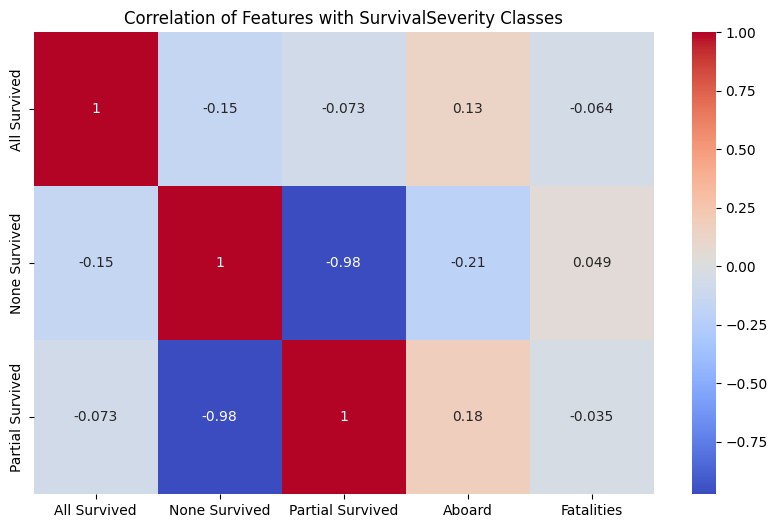

In [ ]:
# One-hot encode target
df_encoded = pd.get_dummies(df['SurvivalSeverity'])

# Check correlation between input features and target
combined = pd.concat([df_encoded, df[['Aboard', 'Fatalities']]], axis=1)
corr = combined.corr()

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(corr.loc[df_encoded.columns, :], cmap='coolwarm', annot=True)
plt.title("Correlation of Features with SurvivalSeverity Classes")
plt.show()



---



# **Part 7**: Train-Test Splitting

In [ ]:
# Perform train-test split: 70% train, 30% test
train_df, test_df = train_test_split(df, stratify=df['SurvivalSeverity'], test_size=0.3, random_state=42)

# Save to CSV files
train_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/train.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/test.csv", index=False)

train_df

Year Month  DayPeriod                                      Type  \
4737  2000   Aug    Morning  Piper Navajo PA-31/ Piper Seminole PA-44   
3719  1987   Nov    Evening        de Havilland Canada DHC-4A Caribou   
3596  1985   Dec    Morning         McDonnell Douglas DC-8 Super 63PF   
2062  1966   Aug    Unknown                            Ilyushin IL-14   
1534  1958   Apr    Evening              de Havilland DH-114 Heron 2D   
...    ...   ...        ...                                       ...   
1205  1952   May    Morning              Handley Page HP-81 Hermes IV   
4622  1999   Feb  Afternoon                            Tupolev TU-154   
3637  1986   Aug    Morning                                Howard 250   
1172  1952   Jan    Unknown                          Junkers JU-52/3m   
3148  1979   Jul    Evening                             Douglas C-47B   

                        Operator LocationType      Continent        Country  \
4737  Patuxent Airways / Private         Land  North America  United States   
3719              Kenn Borek Air       Watery  North America         Canada   
3596               Arrow Airways         Land  North America         Canada   
2062                       Tarom         Land         Europe        Romania   
1534                      Aviaco         Land         Europe          Spain   
...                          ...          ...            ...            ...   
1205    British Overseas Airways         Land         Africa     Mauritania   
4622    China Southwest Airlines         Land           Asia          China   
3637           Southwest Airlift         Land  North America  United States   
1172                  Air France         Land         Africa     Madagascar   
3148     Trans National Airlines         Land  North America  United States   

     WaterBodyType WaterBodyName FederalSubject CauseCategory  \
4737       Unknown       Unknown     New Jersey       Unknown   
3719         River   Ross River,        Unknown       Weather   
3596       Unknown       Unknown   Newfoundland       Unknown   
2062       Unknown       Unknown        Unknown       Unknown   
1534       Unknown       Unknown        Unknown       Unknown   
...            ...           ...            ...           ...   
1205       Unknown       Unknown        Unknown       Unknown   
4622       Unknown       Unknown        Unknown       Unknown   
3637       Unknown       Unknown       Arkansas       Unknown   
1172       Unknown       Unknown        Unknown       Unknown   
3148       Unknown       Unknown         Hawaii       Unknown   

     WeatherCondition FlightPhase  Aboard  Ground  Fatalities  \
4737          Unknown     Unknown      11       0          11   
3719             Rain     Unknown       4       0           2   
3596          Unknown     Takeoff     256       0         256   
2062          Unknown    En Route      24       0          24   
1534          Unknown     Takeoff      16       0          16   
...               ...         ...     ...     ...         ...   
1205          Unknown     Landing      18       0           1   
4622          Unknown     Landing      61       0          61   
3637          Unknown     Takeoff       2       0           2   
1172          Unknown     Unknown      11       0           6   
3148          Unknown     Unknown       3       0           3   

      SurvivalSeverity  
4737     None Survived  
3719  Partial Survived  
3596     None Survived  
2062     None Survived  
1534     None Survived  
...                ...  
1205  Partial Survived  
4622     None Survived  
3637     None Survived  
1172  Partial Survived  
3148     None Survived  

[3665 rows x 18 columns]

In [ ]:
# Checking the shape of the splitted dataset
train_df.shape

(3665, 18)



---



# **Descriptive Analysis**

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/train.csv")

# **Part 1**: Distribution of the Response Variable

In [ ]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['SurvivalSeverity'] != 'Unknown']

# Counts
severityCounts = filtered_df['SurvivalSeverity'].value_counts().reset_index()
severityCounts.columns = ['SurvivalSeverity', 'Count']

# Plot
fig14 = px.pie(
    severityCounts,
    names='SurvivalSeverity',
    values='Count',
    title='Distribution of Survival Severity',
    labels={'SurvivalSeverity': 'Survival Severity', 'Count': 'No. of Crashes'}
)

fig14.update_layout(
    title_x=0.5
)

fig14.show()



---



# **Part 2**: Geographical Analysis

**Part 2.1**: Analysis by the **Location Type** (Land, Watery)

In [ ]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['LocationType'] != 'Unknown']

# Count occurrences of each flight phase
Counts = filtered_df['LocationType'].value_counts().reset_index()
Counts.columns = ['LocationType', 'Count']

# Plot
fig20 = px.pie(
    Counts,
    names='LocationType',
    values='Count',
    title='Distribution of Location Type',
    labels={'LocationType': 'Location Type', 'Count': 'No. of Crashes'}
)

fig20.update_layout(
    title_x=0.5
)

fig20.show()

In [ ]:
# Extract the count of crashes for each 'ServivalSeverity' catogory within 'LocationType' except the 'Unknown' category
crash_counts = train_df[train_df['LocationType'] != 'Unknown'].groupby(['LocationType', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Plot the 'crash_counts' using grouped bar chart
fig = px.bar(
    crash_counts,
    x='LocationType',
    y='CrashCount',
    color='SurvivalSeverity',
    barmode='group',
    title='Crash Counts by Location Type and Survival Severity')
fig

**Part 2.2**: Analysis by **Land**

**Part 2.2.1**: Analysis by **Continent**

In [ ]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['Continent'] != 'Unknown']

# Count occurrences of each flight phase
Counts = filtered_df['Continent'].value_counts().reset_index()
Counts.columns = ['Continent', 'Count']

# Plot
fig21 = px.pie(
    Counts,
    names='Continent',
    values='Count',
    title='Distribution of Continents',
    labels={'Continent': 'Continent', 'Count': 'No. of Crashes'}
)

fig21.update_layout(
    title_x=0.5
)

fig21.show()

In [ ]:
# Extract the count of 'SurvivalSeverity' categories except 'Unkown' within each 'Continent'
crash_counts = train_df[train_df['Continent'] != 'Unknown'].groupby(['Continent', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Plot the 'crash_counts' using grouped bar chart
fig = px.bar(
    crash_counts,
    x='Continent',
    y='CrashCount',
    color='SurvivalSeverity',
    barmode='group',
    title='Crash Counts by Continent and Survival Severity')
fig

Analysis in **North America**

In [ ]:
# Filter for North America and get counts
crash_counts = train_df[train_df['Continent'] == 'North America'].groupby(
    ['Country', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Create a facet map for each SurvivalSeverity category
fig = px.choropleth(
    crash_counts,
    locations='Country',
    locationmode='country names',
    color='CrashCount',
    scope='north america',  # Focus on North America
    facet_col='SurvivalSeverity',  # Create separate maps for each category
    height=400,
    width=1000
)

# Update layout to make the maps side by side
fig.update_layout(
    title_text='Survival Severity Counts in North America',
    geo_scope='north america'  # Ensure we only show North America
)

fig.show()

Analysis in **Europe**

In [ ]:
# Filter for Europe and get counts
crash_counts = train_df[train_df['Continent'] == 'Europe'].groupby(
    ['Country', 'SurvivalSeverity']).size().reset_index(name='CrashCount')

# Create a facet map for each SurvivalSeverity category
fig = px.choropleth(
    crash_counts,
    locations='Country',
    locationmode='country names',
    color='CrashCount',
    scope='europe',  # Focus on Europe
    facet_col='SurvivalSeverity',  # Create separate maps for each category
    height=400,
    width=1000
)

# Update layout to make the maps side by side
fig.update_layout(
    title_text='Survival Severity Counts in Europe',
    geo_scope='europe'  # Ensure we only show Europe
)

fig.show()

 **Part 2.2.2**: Analysis by **Country**




In [ ]:
# Identify number of unique countries
train_df['Country'].nunique()

224

**Word Cloud**: Number of Crashes per Country

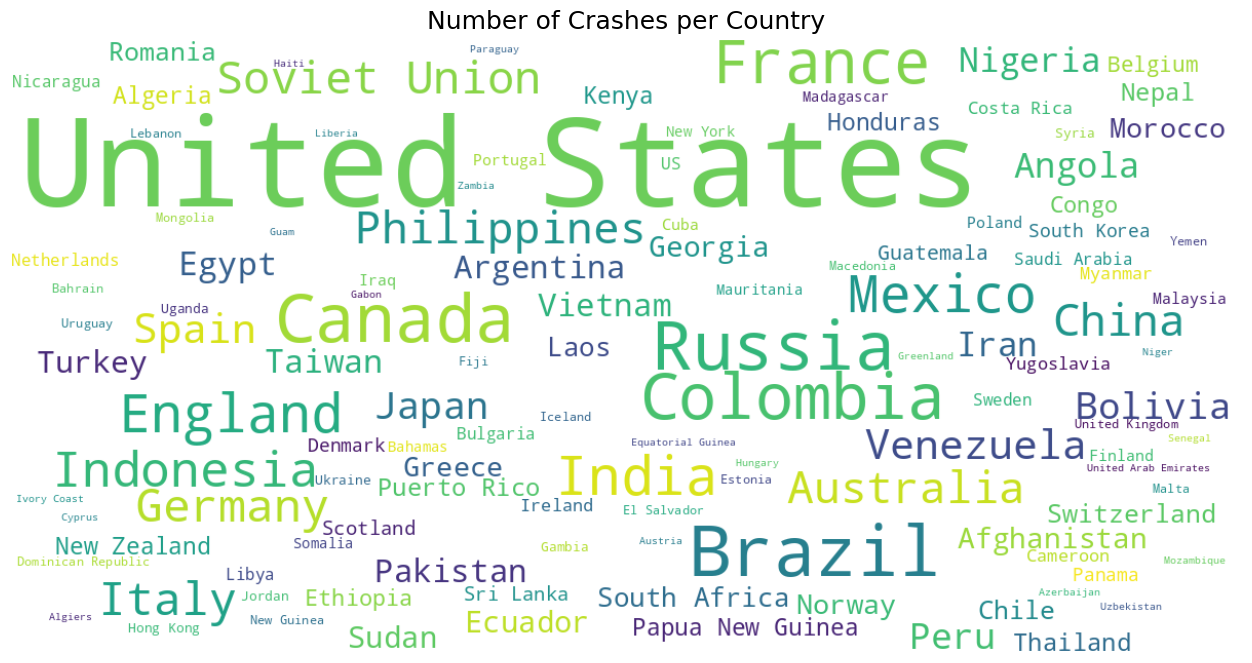

In [ ]:
#! pip install wordcloud
from wordcloud import WordCloud

#Count no. of crashes per country
countryCounts = train_df['Country'].value_counts()
countryCounts = countryCounts[countryCounts.index != 'Unknown']

#Convert to dictionary
countryDict = countryCounts.to_dict()

#Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    max_font_size=120,
    min_font_size=10,
    prefer_horizontal=1.0
).generate_from_frequencies(countryDict)

#Plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Number of Crashes per Country', fontsize=18)

plt.show()

In [ ]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['Country'] != 'Unknown']

# Count of each SurvivalSeverity category for each country
SeverityTable = pd.crosstab(filtered_df['Country'], filtered_df['SurvivalSeverity'])
SeverityTable

SurvivalSeverity  All Survived  None Survived  Partial Survived
Country                                                        
Afghanistan                  0             15                 5
Alaska                       0              1                 1
Algeria                      0              9                 6
Algiers                      0              2                 1
American Samoa               0              0                 1
...                        ...            ...               ...
Western Denmark              0              1                 0
Yemen                        0              2                 2
Yugoslavia                   0              7                 2
Zambia                       0              3                 0
Zimbabwe                     0              0                 2

[223 rows x 3 columns]

The **Dominant** Survival Severity per Country



*   Each country is colored by the most frequent SurvivalSeverity from all its crashes





In [ ]:
# Get the dominant category per country
dominant = train_df.groupby('Country')['SurvivalSeverity'].agg(lambda x: x.value_counts().idxmax()).reset_index()

#dominant[dominant['SurvivalSeverity'] =='Unknown']

# There is no country with dominant SurvivalSeverity 'Unknown'
dominant

Country  SurvivalSeverity
0        Afghanistan     None Survived
1             Alaska  Partial Survived
2            Algeria     None Survived
3            Algiers     None Survived
4     American Samoa  Partial Survived
..               ...               ...
219  Western Denmark     None Survived
220            Yemen  Partial Survived
221       Yugoslavia     None Survived
222           Zambia     None Survived
223         Zimbabwe  Partial Survived

[224 rows x 2 columns]

In [ ]:
# Plot
fig1 = px.choropleth(
    dominant,
    locations="Country",
    locationmode="country names",
    color="SurvivalSeverity",
    title="Most Common SurvivalSeverity per Country",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig1.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    title_x = 0.5
 )

fig1.show()

Severity Score per Country

In [ ]:
# Assign scores
scoreMap = {
    'All Survived': 3,
    'Partial Survived': 2,
    'None Survived': 1,
    'Unknown': 0
}

train_df['SeverityScore'] = train_df['SurvivalSeverity'].map(scoreMap)

# Average score per country
scoreByCountry = train_df.groupby('Country')['SeverityScore'].mean().reset_index()

# Plot
fig2 = px.choropleth(
    scoreByCountry,
    locations='Country',
    locationmode='country names',
    color='SeverityScore',
    color_continuous_scale='RdYlGn',
    range_color=(1,3),
    title='Average Survival Severity Score per Country'
)

# Customize color bar ticks and labels
fig2.update_layout(coloraxis_colorbar=dict(
    title='Severity Score',
    tickvals=[1,2,3],
    ticktext=[
        '1 = None Survived',
        '2 = Partial Survived',
        '3 = All Survived'
    ]
))

fig2.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    title_x = 0.5
 )

fig2.show()

**Proportion Stacked Bar Chart**: Proportional Distribution of SurvivalSeverity per Country



In [ ]:
# Normalize each row to get proportions (otw big counties with many crashes may dominate every chart)
SeverityProportions = SeverityTable.div(SeverityTable.sum(axis=1), axis=0)

# Reset index and melt for plotting
SeverityProportions = SeverityProportions.reset_index().melt(id_vars='Country', var_name='SurvivalSeverity', value_name='Proportion')

# Plot
fig3 = px.bar(
    SeverityProportions,
    x='Country',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Distribution of SurvivalSeverity per Country',
    labels={'Proportion': 'Proportion', 'Country': 'Country', 'SurvivalSeverity': 'SurvivalSeverity'},
    hover_data={'Proportion': ':.2f'} #Show proportion as 2 decimal places
)

fig3.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    title_x=0.5
)

fig3.show()

* Above bar chart plots all 227 countries. But, since there are many names in x axis, plotly has skipped some country names.

**Proportion Stacked Bar Chart**: Filtered for Top 10 Crashes

In [ ]:
# Calculate total crashes per country
totalCrashes = SeverityTable.sum(axis=1)

# Get counties with more than 10 crash
eligibleCountries = totalCrashes[totalCrashes > 10].index

# Filter proportion table
filtered = SeverityProportions[SeverityProportions['Country'].isin(eligibleCountries)]

# Plot
fig4 = px.bar(
    filtered,
    x='Country',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Distribution of SurvivalSeverity per Country (For countries with more than 10 crashes)',
    labels={'Proportion': 'Proportion', 'Country': 'Country', 'SurvivalSeverity': 'SurvivalSeverity'},
    hover_data={'Proportion': ':.2f'} #Show proportion as 2 decimal places
)

fig4.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    title_x=0.5
)

fig4.show()

Analysis in **United States**

In [ ]:
# Filter rows
us_df = train_df[train_df['Country'] == 'United States']
us_df

Year Month DayPeriod                                      Type  \
0     2000   Aug   Morning  Piper Navajo PA-31/ Piper Seminole PA-44   
8     1976   Aug   Morning                                Cessna 185   
13    1990   Aug     Night                 Bell BHT-206-B Helicopter   
17    1953   Sep   Morning                          Convair CV-240-0   
18    1971   Apr   Evening                            Beechcraft C35   
...    ...   ...       ...                                       ...   
3647  1920   Mar   Unknown                         De Havilland DH-4   
3649  1983   Oct   Evening                Hawker Siddeley HS-748-FAA   
3651  1997   Jan   Evening                 Cessna 208B Grand Caravan   
3662  1986   Aug   Morning                                Howard 250   
3664  1979   Jul   Evening                             Douglas C-47B   

                              Operator LocationType      Continent  \
0           Patuxent Airways / Private         Land  North America   
8      Green River Aviation - Air Taxi         Land  North America   
13    Private - Omniflight Helicopters         Land  North America   
17                   American Airlines         Land  North America   
18                New England Aviaiton         Land  North America   
...                                ...          ...            ...   
3647            US Aerial Mail Service         Land  North America   
3649                      Air Illinois         Land  North America   
3651                 Tar Heel Aviation         Land  North America   
3662                 Southwest Airlift         Land  North America   
3664           Trans National Airlines         Land  North America   

            Country WaterBodyType WaterBodyName  FederalSubject CauseCategory  \
0     United States       Unknown       Unknown      New Jersey       Unknown   
8     United States       Unknown       Unknown            Utah       Weather   
13    United States       Unknown       Unknown       Wisconsin       Weather   
17    United States       Unknown       Unknown        New York       Weather   
18    United States       Unknown       Unknown   New Hampshire    Mechanical   
...             ...           ...           ...             ...           ...   
3647  United States       Unknown       Unknown      New Jersey       Unknown   
3649  United States       Unknown       Unknown        Illinois    Mechanical   
3651  United States       Unknown       Unknown  North Carolina       Weather   
3662  United States       Unknown       Unknown        Arkansas       Unknown   
3664  United States       Unknown       Unknown          Hawaii       Unknown   

     WeatherCondition FlightPhase  Aboard  Ground  Fatalities  \
0             Unknown     Unknown      11       0          11   
8                Rain     Takeoff       3       0           3   
13                Fog     Unknown       5       0           5   
17                Fog     Landing      28       0          28   
18            Unknown     Takeoff       4       0           4   
...               ...         ...     ...     ...         ...   
3647          Unknown     Unknown       1       0           1   
3649          Unknown     Unknown      10       0          10   
3651              Fog     Landing       2       0           2   
3662          Unknown     Takeoff       2       0           2   
3664          Unknown     Unknown       3       0           3   

     SurvivalSeverity  SeverityScore  
0       None Survived              1  
8       None Survived              1  
13      None Survived              1  
17      None Survived              1  
18      None Survived              1  
...               ...            ...  
3647    None Survived              1  
3649    None Survived              1  
3651    None Survived              1  
3662    None Survived              1  
3664    None Survived              1  

[902 rows x 19 columns]

In [ ]:
# States
us_df['FederalSubject'].unique()

array(['New Jersey', 'Utah', 'Wisconsin', 'New York', 'New Hampshire',
       'Washington', 'California', 'Indiana', 'New Mexico', 'Hawaii',
       'Michigan', 'Ohio', 'North Carolina', 'Mississippi', 'Colorado',
       'Kansas', 'Unknown', 'Oregon', 'Delaware', 'Alaska', 'Texas',
       'Louisiana', 'Florida', 'Oklahoma', 'Rhode Island', 'Nevada',
       'Arkansas', 'Pennsylvania', 'Maryland', 'Arizona', 'Illinois',
       'Montana', 'South Carolina', 'Alabama', 'Massachusetts', 'Maine',
       'West Virginia', 'Wyoming', 'Vermont', 'Idaho', 'North Dakota',
       'Virginia', 'Iowa', 'Kentucky', 'Missouri', 'Tennessee',
       'Connecticut', 'Minnesota', 'Nebraska', 'South Dakota'],
      dtype=object)

In [ ]:
# Filter out 'Unknown' categoty
us_df = us_df[us_df['FederalSubject'] != 'Unknown']

# Count occurrences of each state
crashesPerState = us_df['FederalSubject'].value_counts().reset_index()
crashesPerState.columns = ['FederalSubject', 'Count']

# To locationmode = 'US-states' to work properly states should be in two-letter state abbreviations
# Dictionary mapping full state names to their two-letter codes
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

crashesPerState['StateCode'] = crashesPerState['FederalSubject'].map(state_abbrev)
crashesPerState

FederalSubject  Count StateCode
0           Alaska    114        AK
1       California     97        CA
2            Texas     39        TX
3         New York     33        NY
4             Ohio     32        OH
5     Pennsylvania     29        PA
6         Illinois     28        IL
7       Washington     27        WA
8          Florida     27        FL
9       New Jersey     26        NJ
10        Colorado     25        CO
11          Hawaii     24        HI
12        Michigan     22        MI
13         Arizona     21        AZ
14          Nevada     19        NV
15      New Mexico     19        NM
16  North Carolina     17        NC
17        Missouri     17        MO
18        Virginia     17        VA
19            Utah     17        UT
20       Louisiana     17        LA
21         Montana     15        MT
22         Indiana     15        IN
23           Idaho     14        ID
24        Maryland     14        MD
25          Oregon     13        OR
26   Massachusetts     12        MA
27         Alabama     12        AL
28     Connecticut     12        CT
29         Wyoming     12        WY
30       Tennessee     11        TN
31          Kansas     11        KS
32       Minnesota     10        MN
33   West Virginia      9        WV
34       Wisconsin      8        WI
35        Arkansas      7        AR
36     Mississippi      7        MS
37        Kentucky      7        KY
38        Nebraska      7        NE
39   New Hampshire      6        NH
40            Iowa      6        IA
41  South Carolina      5        SC
42        Oklahoma      5        OK
43         Vermont      4        VT
44    Rhode Island      3        RI
45           Maine      3        ME
46        Delaware      2        DE
47    North Dakota      2        ND
48    South Dakota      2        SD

**Part 2.2.3**: Analysis by **Federal-Subjects/State**

**Part 2.2.3.1**: Based on **USA** States

**Bar Chart**: Number of Crashes per State

In [ ]:
# Plot
fig15 = px.bar(
    crashesPerState,
    x='FederalSubject',
    y='Count',
    title='No. of Crashes per State',
    labels={'Count': 'Crashes', 'FederalSubject': 'State'},
    color='Count',
    color_continuous_scale='RdYlGn_r'
)

fig15.update_layout(
    title_x=0.5
)

fig15.show()

**Geo-location HeatMap**: Crash Count by US State

In [ ]:
fig16 = px.choropleth(
    crashesPerState,
    locations='StateCode',
    locationmode='USA-states',
    color='Count',
    scope='usa',
    color_continuous_scale='RdYlGn_r',
    hover_name='FederalSubject',
    title='Crash Count by US State',
    width=1000,
    height=700
)

fig16.update_layout(
    title_x=0.5
)

fig16.show()

The **Dominant** Survival Severity per country

In [ ]:
# Adding stateCodes to the data set
us_df['StateCode'] = us_df['FederalSubject'].map(state_abbrev)

# Get the dominant category per state
stateDominant =us_df.groupby(['StateCode', 'FederalSubject'])['SurvivalSeverity'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Plot
fig17 = px.choropleth(
    stateDominant,
    locations="StateCode",
    locationmode="USA-states",
    color="SurvivalSeverity",
    scope='usa',
    title="Most Common Survival Severity per State",
    color_discrete_sequence=px.colors.qualitative.Set1,
    hover_name='FederalSubject'
)

fig17.update_layout(
    title_x = 0.5,
    width=1000,
    height=700
 )

fig17.show()

**Severity Score** per State

In [ ]:
us_df['SeverityScore'] =us_df['SurvivalSeverity'].map(scoreMap)

# Average score per State
scoreByState = us_df.groupby(['StateCode', 'FederalSubject'])['SeverityScore'].mean().reset_index()

# Plot
fig18 = px.choropleth(
    scoreByState,
    locations="StateCode",
    locationmode="USA-states",
    color='SeverityScore',
    scope='usa',
    color_continuous_scale='RdYlGn',
    range_color=(1,3),
    title='Average Survival Severity Score per State',
    hover_name='FederalSubject'
)

# Customize color bar ticks and labels
fig18.update_layout(coloraxis_colorbar=dict(
    title='Severity Score',
    tickvals=[1,2,3],
    ticktext=[
        '1 = None Survived',
        '2 = Partial Survived',
        '3 = All Survived'
      ]
))

fig18.update_layout(
    title_x = 0.5,
    width=1000,
    height=700
 )

fig18.show()

**Proportion Stacked Bar Chart**: Proportional Distribution of Survival Severity per State

In [ ]:
# Count of each SurvivalSeverity category for each state
SeverityTable = pd.crosstab(us_df['FederalSubject'], us_df['SurvivalSeverity'])
SeverityTable

# Normalize each row to get proportions
SeverityProportions = SeverityTable.div(SeverityTable.sum(axis=1), axis=0)

# Reset index and melt for plotting
SeverityProportions = SeverityProportions.reset_index().melt(id_vars='FederalSubject', var_name='SurvivalSeverity', value_name='Proportion')
SeverityProportions

FederalSubject  SurvivalSeverity  Proportion
0          Alabama      All Survived    0.000000
1           Alaska      All Survived    0.008772
2          Arizona      All Survived    0.000000
3         Arkansas      All Survived    0.000000
4       California      All Survived    0.061856
..             ...               ...         ...
142       Virginia  Partial Survived    0.176471
143     Washington  Partial Survived    0.259259
144  West Virginia  Partial Survived    0.333333
145      Wisconsin  Partial Survived    0.375000
146        Wyoming  Partial Survived    0.083333

[147 rows x 3 columns]

In [ ]:
# Plot
fig19 = px.bar(
    SeverityProportions,
    x='FederalSubject',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Distribution of SurvivalSeverity per State',
    labels={'Proportion': 'Proportion', 'FederalSubject': 'State', 'SurvivalSeverity': 'SurvivalSeverity'},
    hover_data={'Proportion': ':.2f'} #Show proportion as 2 decimal places
)

fig19.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,
    title_x=0.5
)

fig19.show()

**Part 2.2.3.2**: Based on Other States

In [ ]:
# Identify number of FederalSubject in the data set
train_df['FederalSubject'].nunique()


281

In [ ]:
# Create a clean dataframe by removing 'Unknown' entries
clean_df = train_df[train_df['FederalSubject'] != 'Unknown'].copy()

# Count how many rows were removed
removed_count = len(train_df) - len(clean_df)
print(f"Removed {removed_count} rows with 'Unknown' FederalSubject")

Removed 2329 rows with 'Unknown' FederalSubject


In [ ]:
# Count crashes per FederalSubject
crash_counts = clean_df['FederalSubject'].value_counts().reset_index()
crash_counts.columns = ['FederalSubject', 'CrashCount']

# Display the results
crash_counts

FederalSubject  CrashCount
0           Alaska         114
1       California          97
2            Texas          39
3         New York          37
4             Ohio          32
..             ...         ...
275        Antigua           1
276     Afghanstan           1
277        Belarus           1
278    South Yemen           1
279      Virginia.           1

[280 rows x 2 columns]

In [ ]:
# FederalSubject of each SurvivalSeverity category for each FederalSubject
SeverityTableFedaral = pd.crosstab(clean_df['FederalSubject'], train_df['SurvivalSeverity'])
SeverityTableFedaral

SurvivalSeverity          All Survived  None Survived  Partial Survived
FederalSubject                                                         
10 mile SE of Tell City              0              1                 0
10 miles SW of Las Vegas             0              1                 0
ACT                                  0              1                 0
AK                                   0              1                 1
Aaland Island                        0              0                 1
...                                ...            ...               ...
Wyoming                              0             11                 1
Yukon Territory                      0              1                 0
Zaire                                0              4                 6
Zaïre                                0              1                 0
Zulia                                0              1                 0

[280 rows x 3 columns]

The **Dominant** Survival Severity per Federal-Subject

In [ ]:
# Get the most common SurvivalSeverity for each FederalSubject
highest_severity = clean_df.groupby('FederalSubject')['SurvivalSeverity'] \
                          .apply(lambda x: x.value_counts().idxmax()) \
                          .reset_index()
highest_severity.columns = ['FederalSubject', 'MostCommonSurvivalSeverity']

# Display the result
print("Most common SurvivalSeverity for each FederalSubject:")
display(highest_severity)

Most common SurvivalSeverity for each FederalSubject:


FederalSubject MostCommonSurvivalSeverity
0     10 mile SE of Tell City              None Survived
1    10 miles SW of Las Vegas              None Survived
2                         ACT              None Survived
3                          AK              None Survived
4               Aaland Island           Partial Survived
..                        ...                        ...
275                   Wyoming              None Survived
276           Yukon Territory              None Survived
277                     Zaire           Partial Survived
278                     Zaïre              None Survived
279                     Zulia              None Survived

[280 rows x 2 columns]

In [ ]:
# Plot for the most common SurvivalSeverity for each FederalSubject
import plotly.express as px

# First get the most common SurvivalSeverity for each FederalSubject
highest_severity = clean_df.groupby('FederalSubject')['SurvivalSeverity'] \
                          .apply(lambda x: x.value_counts().idxmax()) \
                          .reset_index()
highest_severity.columns = ['FederalSubject', 'MostCommonSeverity']

# Create the choropleth map
fig = px.choropleth(
    highest_severity,
    locations="FederalSubject",  # Your region names
    locationmode="country names",  # Try other modes if needed
    color="MostCommonSeverity",   # The column with your survival categories
    title="Most Common Plane Crash Survival Severity by Region",
    color_discrete_map={  # Custom colors for each category
        'All Survived': '#2ecc71',    # Green
        'Partial Survived': '#f39c12', # Orange
        'None Survived': '#e74c3c'     # Red
    },
    hover_name="FederalSubject",  # Show region name on hover
    hover_data={"MostCommonSeverity": True, "FederalSubject": False}  # Customize hover
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'  # Try 'equirectangular' or 'robinson'
    ),
    margin={"r":0,"t":40,"l":0,"b":0},
    title_x=0.5,
    legend_title_text='Survival Severity'
)

# Show the plot
fig.show()

**Grouped Bar Chart**: Proportional Distribution of Survival Severity per Federal Subject

In [ ]:
import plotly.express as px
import pandas as pd

# 1. Calculate proportions (fixed version)
proportions = (clean_df.groupby(['FederalSubject', 'SurvivalSeverity'])
                     .size()
                     .unstack(fill_value=0)
                     .apply(lambda x: 100 * x / x.sum(), axis=1)
                     .stack()
                     .reset_index(name='Percentage'))

# 2. Define color mapping
color_map = {
    'All Survived': '#2ecc71',    # Green
    'Partial Survived': '#f39c12', # Orange
    'None Survived': '#e74c3c'     # Red
}

# 3. Create interactive stacked bar chart
fig = px.bar(proportions,
             x='FederalSubject',
             y='Percentage',
             color='SurvivalSeverity',
             title='<b>Proportional Distribution of Survival Severity per Federal Subject</b><br><sup>Percentage of each outcome by region</sup>',
             color_discrete_map=color_map,
             barmode='stack',
             hover_data={'Percentage': ':.1f%'},
             labels={'Percentage': 'Proportion (%)'},
             height=600)

# 4. Customize layout
fig.update_layout(
    xaxis_title='Federal Subject',
    yaxis_title='Percentage Distribution',
    legend_title='Survival Outcome',
    hovermode='x unified',
    xaxis={'categoryorder': 'total descending'},
    title_x=0.5,
    plot_bgcolor='white'
)

# 5. Format hover template
fig.update_traces(hovertemplate='%{y:.1f}%')

fig.show()

**Top 10** Federal-Subjects by Crash Count

In [ ]:
import plotly.express as px
import pandas as pd

# 1. Get top 10 FederalSubjects by total crash count
top_10_regions = clean_df['FederalSubject'].value_counts().head(10).index

# 2. Filter data for these regions
top_10_data = clean_df[clean_df['FederalSubject'].isin(top_10_regions)]

# 3. Create cross-tabulation
crash_counts = pd.crosstab(top_10_data['FederalSubject'], top_10_data['SurvivalSeverity'])

# 4. Sort by total crashes (descending)
crash_counts['Total'] = crash_counts.sum(axis=1)
crash_counts = crash_counts.sort_values('Total', ascending=False).drop('Total', axis=1)

# 5. Reset index for Plotly
crash_counts = crash_counts.reset_index()

# 6. Melt the dataframe for Plotly
plotly_data = pd.melt(crash_counts,
                     id_vars='FederalSubject',
                     value_vars=['All Survived', 'Partial Survived', 'None Survived'],
                     var_name='SurvivalSeverity',
                     value_name='CrashCount')

# 7. Create the plot
fig = px.bar(plotly_data,
             x='FederalSubject',
             y='CrashCount',
             color='SurvivalSeverity',
             color_discrete_sequence=['#2ecc71', '#f39c12', '#e74c3c'],  # Green, Orange, Red
             barmode='group',  # Use 'stack' for stacked bars
             text='CrashCount',  # Show values on bars
             title='Top 10 Federal Subjects by Crash Count<br><sup>Breakdown by Survival Severity</sup>',
             width=1000,
             height=600)

# 8. Customize the plot
fig.update_layout(
    xaxis_title='Federal Subject',
    yaxis_title='Number of Crashes',
    legend_title='Survival Severity',
    hovermode='x unified',
    xaxis={'categoryorder':'total descending'},
    title_x=0.5,
    title_font_size=20
)

# 9. Improve text display
fig.update_traces(textposition='outside',
                 textfont_size=12,
                 textangle=0)

# 10. Add grid lines
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()



---



# **Part 3:** Temporal Analysis

**Part 3.1**: Analysis by **Year**

Number of Crashes per Year

In [ ]:
# Count crashes per year
crashesPerYear = train_df['Year'].value_counts().sort_index()

# Convert to a data frame
crashesPerYear_df = crashesPerYear.reset_index()
crashesPerYear_df.columns = ['Year', 'CrashCount']

fig9 = px.line(
    crashesPerYear_df,
    x='Year',
    y='CrashCount',
    markers=True,
    title='Number of Crashes per Year',
    labels={'CrashCount': 'Count', 'Year': 'Year'}
)

fig9.update_layout(
    title_x=0.5
)

fig9.show()

 **Stacked Area Chart** of Proportions Over Time

In [ ]:
# Group and normalize per year
yearlyCounts = pd.crosstab(train_df['Year'], train_df['SurvivalSeverity'])
yearlyProps = yearlyCounts.div(yearlyCounts.sum(axis=1), axis=0).reset_index()

# Melt for plotting
yearlyMelted = yearlyProps.melt(id_vars='Year', var_name='SurvivalSeverity', value_name='Proportion')

# Plot
fig5 = px.area(
    yearlyMelted,
    x='Year',
    y='Proportion',
    color='SurvivalSeverity',
    title='SurvivalSeverity Trends Over Time',
    labels={'Proportion': 'Proportion of Crashes'}
)

fig5.update_layout(
    title_x=0.5
)

fig5.show()

* This plot shows proportion of each SurvivalSeverity class per year **by area**. Before 1940 most years are dominated by None Survived class (red). So **earlier aviation crashes were often more fatal**. Starting from 1920s to 2000s, the proportion (area) of partial survival becomes more consistent and increases slightly, indicating **gradual improvement in survival chances over time**. All survival is present but very low and inconsistent across all years.

**Line Chart** of Each Survival Severity Class Over Time (Plot seperate lines per class)

In [ ]:
fig6 = px.line(
    yearlyMelted,
    x='Year',
    y='Proportion',
    color='SurvivalSeverity',
    title='Proportional Change in SurvivalSeverity Over Time'
)

fig6.update_layout(
    title_x=0.5
)

fig6.show()

Comparing Pre and Post **1980**

* 1980 is used in aviation research as a symbolic boundary between the early era and modern era

In [ ]:
train_df['Period'] = train_df['Year'].apply(lambda x: 'Pre-1980' if x<1980 else 'Post-1980')
periodCounts = pd.crosstab(train_df['Period'], train_df['SurvivalSeverity'])
periodProps = periodCounts.div(periodCounts.sum(axis=1), axis=0).reset_index()

#Melt for plot
meltedPeriod = periodProps.melt(id_vars='Period', var_name='SurvivalSeverity', value_name='Proportion')

#plot
fig7 = px.bar(
    meltedPeriod,
    x='Period',
    y='Proportion',
    color='SurvivalSeverity',
    barmode='stack',
    title='SurvivalSeverity Before and After 1980'
)

fig7.update_layout(
    title_x=0.5
)

fig7.show()

**Part 3.2**: Analysis by **Month**

* **Bar Chart** of Crashes per Month

In [ ]:
#Count crashes of each Month
MonthlyCrashes = train_df['Month'].value_counts().reset_index()
MonthlyCrashes.columns = ['Month', 'Count']

# Define correct month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Ensure Month column uses cotegorical ordering
MonthlyCrashes['Month'] = pd.Categorical(
    MonthlyCrashes['Month'],
    categories=month_order,
    ordered=True
)

#Sort by calender order
MonthlyCrashes = MonthlyCrashes.sort_values('Month')

#Plot
fig20 = px.bar(
    MonthlyCrashes,
    x='Month',
    y='Count',
    title='Number of Crashes per Month',
    labels={'Month': 'Month', 'Count': 'Total Crashes'}
)

fig20.update_layout(
        title_x=0.5
)

fig20.show()

**Part 3.3**: Analysis by **Day-Period** (Morning, Noon,...)

In [ ]:
# Extract the count for each SurvivalSeverity category in each DayPeriod except the 'Unknown' category
dayPeriodCounts = train_df[train_df['DayPeriod'] != 'Unknown'].groupby(['DayPeriod', 'SurvivalSeverity']).size().unstack(fill_value=0)

# Plot the grouped bar char for dayPeriodCounts by SurvivalSeverity and DayPeriod
fig = px.bar(
    dayPeriodCounts.reset_index(),
    x='DayPeriod',
    y=['All Survived', 'Partial Survived', 'None Survived'],
    barmode='group',
    title='Number of Crashes by Day Period')

fig.update_layout(legend_title='Survival Severity')
fig



---



#**Part 4:** Operator-Specific Analysis

In [ ]:
# Identify number of unique operators
train_df['Operator'].nunique()

1869

**Word Cloud:** Number of Crashes per Operator

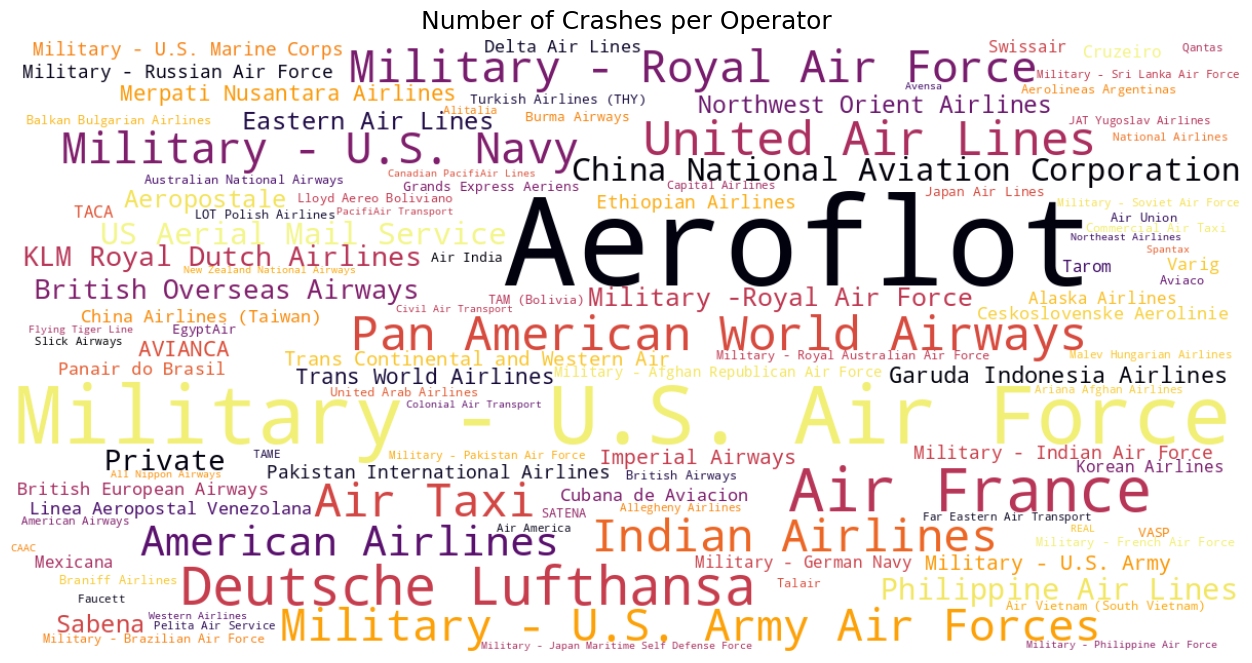

In [ ]:
# Count no. of crashes per operator
operatorCounts = train_df['Operator'].value_counts()
operatorCounts = operatorCounts[operatorCounts.index != 'Unknown']

# Convert to dictionary
operatorDict = operatorCounts.to_dict()

# Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='inferno',
    max_font_size=120,
    min_font_size=10,
    prefer_horizontal=1.0
).generate_from_frequencies(operatorDict)

# Plot
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Number of Crashes per Operator', fontsize=18)

plt.show()

In [ ]:
# Since plotting with 1869 airlines can be overwhelming, select airlines with more than 5 crashes

# Filter airlines
validOperators = operatorCounts[operatorCounts >= 5].index

filtered_df = train_df[train_df['Operator'].isin(validOperators)]
#filtered_df

filtered_df['Operator'].nunique()

110

**Stacked-Bar Chart**: Survival Severity per Operators (with more than 5 crashes)

In [ ]:
table = pd.crosstab(filtered_df['Operator'], filtered_df['SurvivalSeverity'])
tableProp = table.div(table.sum(axis=1), axis=0).reset_index()
df_melted = tableProp.melt(id_vars='Operator', var_name='SurvivalSeverity', value_name='Proportion')

# Plot
fig8 = px.bar(
    df_melted,
    x='Operator',
    y='Proportion',
    color='SurvivalSeverity',
    title='Survival Severity per Operators (with more than 5 crashes)',
    barmode='stack',
    labels={'Proportion': 'Proportion', 'Operator': 'Operator'}
)

fig8.update_layout(
    xaxis_tickangle=-45,
    title_x=0.5
)

fig8.show()

**Average Severity Score** per Operator

In [ ]:
# Assign scores
scoreMap = {
    'All Survived': 3,
    'Partial Survived': 2,
    'None Survived': 1,
    'Unknown': 0
}

filtered_df['SeverityScore'] = filtered_df['SurvivalSeverity'].map(scoreMap)

# Calculate average severity score per operator
avgSeverityByOperator = filtered_df.groupby('Operator')['SeverityScore'].mean().reset_index()

# Plot
fig10 = px.bar(
    avgSeverityByOperator,
    x='Operator',
    y='SeverityScore',
    title='Average Severity Score per Operator',
    labels={'SeverityScore': 'Avg Severity Score', 'Operator': 'Operator'},
    color='SeverityScore',
    color_continuous_scale='RdYlGn'
)

fig10.update_layout(
    title_x=0.5
)

fig10.show()

**Average Severity Score** for **Top 10** Operators

In [ ]:
# Get the top 10 operators by crash count
top_10_operators = operatorCounts.head(10).index.tolist()

# Filter the DataFrame to include only the top 10 operators
top_10_df = filtered_df[filtered_df['Operator'].isin(top_10_operators)].copy()

# Calculate average severity score per operator for the top 10
avgSeverityByTop10Operator = top_10_df.groupby('Operator')['SeverityScore'].mean().reset_index()

# Sort by average severity score
avgSeverityByTop10Operator = avgSeverityByTop10Operator.sort_values('SeverityScore', ascending=False)


# Plot
fig = px.bar(
    avgSeverityByTop10Operator,
    x='Operator',
    y='SeverityScore',
    title='Average Severity Score for Top 10 Operators',
    labels={'SeverityScore': 'Avg Severity Score', 'Operator': 'Operator'},
    color='SeverityScore',
    color_continuous_scale='RdYlGn',
    range_color=(1,3)
)

fig.update_layout(
    title_x=0.5
)

fig.show()



---



# **Part 5**: Analysis in Flight Phase

In [ ]:
# Categories
train_df['FlightPhase'].unique()

array(['Unknown', 'Takeoff', 'En Route', 'Landing'], dtype=object)

In [ ]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['FlightPhase'] != 'Unknown']

# Count occurrences of each flight phase
phaseCounts = filtered_df['FlightPhase'].value_counts().reset_index()
phaseCounts.columns = ['FlightPhase', 'Count']

# Plot
fig11 = px.pie(
    phaseCounts,
    names='FlightPhase',
    values='Count',
    title='Distribution of Flight Phase',
    labels={'FlightPhase': 'Flight Phase', 'Count': 'No. of Crashes'}
)

fig11.update_layout(
    title_x=0.5
)

fig11.show()

Survival Severity by Flight Phases

In [ ]:
# Filter out 'Unknown' categoty from 'FlightPhase'
filtered_df = train_df[train_df['FlightPhase'] != 'Unknown']

# Count occurrences of each flight phase category within each SurvivalSeverity category
phase_severity_counts = filtered_df.groupby(['FlightPhase', 'SurvivalSeverity']).size().reset_index(name='Count')

# Plot the grouped bar chart
fig = px.bar(
    phase_severity_counts,
    x='FlightPhase',
    y='Count',
    color='SurvivalSeverity',
    barmode='group',
    title='Survival Severity by Flight Phase',
    labels={'FlightPhase': 'Flight Phase', 'Count': 'Number of Crashes'}
)

fig.update_layout(
    title_x=0.5
)

fig.show()

---



# **Part 6**: Analysis in Weather Conditions

In [ ]:
# Categories
train_df['WeatherCondition'].unique()

array(['Unknown', 'Rain', 'Fog', 'Thunderstorm', 'Clear', 'Snow'],
      dtype=object)

In [ ]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['WeatherCondition'] != 'Unknown']

# Counts
weatherCounts = filtered_df['WeatherCondition'].value_counts().reset_index()
weatherCounts.columns = ['WeatherCondition', 'Count']

# Plot
fig12 = px.pie(
    weatherCounts,
    names='WeatherCondition',
    values='Count',
    title='Distribution of Weather Condition',
    labels={'WeatherCondition': 'Weather Condition', 'Count': 'No. of Crashes'}
)

fig12.update_layout(
    title_x=0.5
)

fig12.show()

Survival Severity by Weather Conditions

In [ ]:
# Filter out 'Unknown' category from 'WeatherCondition'
filtered_df = train_df[train_df['WeatherCondition'] != 'Unknown']

# Count occurrences of each weather condition category within each SurvivalSeverity category
weather_severity_counts = filtered_df.groupby(['WeatherCondition', 'SurvivalSeverity']).size().reset_index(name='Count')

# Plot the grouped bar chart
fig = px.bar(
    weather_severity_counts,
    x='WeatherCondition',
    y='Count',
    color='SurvivalSeverity',
    barmode='group',
    title='Survival Severity by Weather Condition',
    labels={'WeatherCondition': 'Weather Condition', 'Count': 'Number of Crashes'}
)

fig.update_layout(
    title_x=0.5
)

fig.show()



---



# **Part 7**: Analysis in Crash-Caused Categories

In [ ]:
# Categories
train_df['CauseCategory'].unique()

array(['Unknown', 'Weather', 'Mechanical', 'External', 'Human Error'],
      dtype=object)

In [ ]:
# Filter out 'Unknown' categoty
filtered_df = train_df[train_df['CauseCategory'] != 'Unknown']

# Counts
causeCounts = filtered_df['CauseCategory'].value_counts().reset_index()
causeCounts.columns = ['CauseCategory', 'Count']

# Plot
fig13 = px.pie(
    causeCounts,
    names='CauseCategory',
    values='Count',
    title='Distribution of Causes for the crash',
    labels={'CauseCategory': 'Cause', 'Count': 'No. of Crashes'}
)

fig13.update_layout(
    title_x=0.5
)

fig13.show()

Survival Severity by Crash Causes

In [ ]:
# Filter out 'Unknown' category from CauseCategory'
filtered_df = train_df[train_df['CauseCategory'] != 'Unknown']

# Count occurrences of each crashcCause category within each SurvivalSeverity category
weather_severity_counts = filtered_df.groupby(['CauseCategory', 'SurvivalSeverity']).size().reset_index(name='Count')

# Plot the grouped bar chart
fig = px.bar(
    weather_severity_counts,
    x='CauseCategory',
    y='Count',
    color='SurvivalSeverity',
    barmode='group',
    title='Survival Severity by Crash Cause',
    labels={'CauseCategory': 'Crash Cause', 'Count': 'Number of Crashes'}
)

fig.update_layout(
    title_x=0.5
)

fig.show()



---



# **Cluster Analysis**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/Airplane_Crashes_and_Fatalities_Since_1908_Cleaned.csv")

In [ ]:
# Categorical Variables (qualitative / text-based or group identifiers) in cleanened dataset
cats = ['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country', 'WaterBodyType', 'WaterBodyName',
        'FederalSubject', 'CauseCategory', 'WeatherCondition', 'FlightPhase', 'SurvivalSeverity']

# Quantitative Variables (numeric and measurable) in cleanened dataset
quants = ['Aboard', 'Ground', 'Fatalities']

In [ ]:
# Drop rows with missing values in selected columns
df_cluster = df[quants + cats].dropna().copy()

# Convert categorical to string
for col in cats:
    df_cluster[col] = df[col].astype(str)

#**Part 1**: Calculate the Gower's Distance Matrix

In [ ]:
!pip install gower

In [ ]:
import gower

# Ensure all numerical columns are standard NumPy types
for col in quants:
    df_cluster[col] = df_cluster[col].astype(float)

# Ensure all categorical columns are strings
for col in cats:
    df_cluster[col] = df_cluster[col].astype(str)
    # Choose all categories except 'Unkown' if it is exist
    if 'Unknown' in df_cluster[col].unique():
        df_cluster[col] = df_cluster[col].apply(lambda x: x if x != 'Unknown' else None)

# Now compute Gower matrix
gower_matrix = gower.gower_matrix(df_cluster)

In [ ]:
# The Gower matrix
pd.DataFrame(gower_matrix)

0         1         2         3         4         5         6     \
0     0.000000  0.667307  0.444531  0.613903  0.505179  0.505270  0.447626   
1     0.667307  0.000000  0.611837  0.613263  0.504539  0.671297  0.558097   
2     0.444531  0.611837  0.000000  0.725100  0.394154  0.560912  0.447713   
3     0.613903  0.613263  0.725100  0.000000  0.557943  0.558034  0.556118   
4     0.505179  0.504539  0.394154  0.557943  0.000000  0.390695  0.224219   
...        ...       ...       ...       ...       ...       ...       ...   
5230  0.503000  0.557916  0.447531  0.722776  0.391068  0.502270  0.333515   
5231  0.518773  0.629244  0.574415  0.738204  0.458039  0.513503  0.515591   
5232  0.818905  0.484932  0.763436  0.538336  0.702615  0.702524  0.704612   
5233  0.555642  0.667393  0.444444  0.725100  0.505265  0.616468  0.558824   
5234  0.668759  0.723675  0.557734  0.722921  0.558642  0.614289  0.556645   

          7         8         9     ...      5225      5226      5227  \
0     0.503363  0.503726  0.558737  ...  0.615201  0.556377  0.612840   
1     0.502723  0.614198  0.613653  ...  0.670116  0.555737  0.612200   
2     0.392339  0.503813  0.503268  ...  0.559731  0.500908  0.557371   
3     0.667238  0.556490  0.611674  ...  0.667965  0.779748  0.723284   
4     0.335149  0.334786  0.279775  ...  0.501089  0.393246  0.447894   
...        ...       ...       ...  ...       ...       ...       ...   
5230  0.389252  0.445171  0.444626  ...  0.389978  0.391068  0.445715   
5231  0.515410  0.570602  0.571147  ...  0.403572  0.240174  0.294822   
5232  0.704431  0.648512  0.649057  ...  0.592594  0.706973  0.650509   
5233  0.559005  0.559368  0.558824  ...  0.448620  0.500908  0.446260   
5234  0.501271  0.557190  0.556645  ...  0.335330  0.445715  0.389252   

          5228      5229      5230      5231      5232      5233      5234  
0     0.445221  0.556559  0.503000  0.518773  0.818905  0.555642  0.668759  
1     0.612010  0.500363  0.557916  0.629244  0.484932  0.667393  0.723675  
2     0.500863  0.501089  0.447531  0.574415  0.763436  0.444444  0.557734  
3     0.668682  0.779566  0.722776  0.738204  0.538336  0.725100  0.722921  
4     0.448847  0.448620  0.391068  0.458039  0.702615  0.505265  0.558642  
...        ...       ...       ...       ...       ...       ...       ...  
5230  0.224446  0.446442  0.000000  0.404662  0.649238  0.503087  0.500908  
5231  0.406886  0.462214  0.404662  0.000000  0.744658  0.574415  0.516681  
5232  0.707018  0.651236  0.649238  0.744658  0.000000  0.596769  0.594591  
5233  0.556418  0.501089  0.503087  0.574415  0.596769  0.000000  0.446623  
5234  0.556872  0.501089  0.500908  0.516681  0.594591  0.446623  0.000000  

[5235 rows x 5235 columns]

In [ ]:
!pip install scikit-learn-extra
#!pip install sklearn_extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.6 MB/s eta 0:00:00


In [ ]:
import numpy
print(numpy.__version__)

2.0.2


In [ ]:
!pip install "numpy<2.0.0" --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# **Part 2**: Apply the KMediods with the Gower's Distance

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

costs = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmedoids.fit(gower_matrix)
    costs.append(kmedoids.inertia_)
    labels = kmedoids.labels_
    silhouette_scores.append(silhouette_score(gower_matrix, labels, metric='precomputed'))

# **Part 3**: Visualizing the Quality of Clusters

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Scree Plot (K-Medoids Cost)",
                                   "Average Silhouette Width"))

# Add scree plot (left)
fig.add_trace(
    go.Scatter(
        x=list(K),
        y=costs,
        mode='lines+markers',
        marker=dict(size=8),
        line=dict(width=2),
        name='Cost'
    ),
    row=1, col=1
)

# Add silhouette plot (right)
fig.add_trace(
    go.Scatter(
        x=list(K),
        y=silhouette_scores,
        mode='lines+markers',
        marker=dict(size=8, color='green'),
        line=dict(width=2, color='green'),
        name='Silhouette Score'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="Cluster Evaluation Metrics",
    showlegend=False,
    width=1000,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50),
    plot_bgcolor='white'
)

# Update axes
fig.update_xaxes(title_text="Number of Clusters (k)", row=1, col=1)
fig.update_yaxes(title_text="Cost", row=1, col=1)
fig.update_xaxes(title_text="Number of Clusters (k)", row=1, col=2)
fig.update_yaxes(title_text="Silhouette Score", row=1, col=2)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()



---



#**Hybrid Dimensionality Reduction Approach**

In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import prince

# Remove the target variable ('SurvivalSeverity') from input features
cats.remove('SurvivalSeverity')

# Subsets
X_num = df[quants]
X_cat = df[cats]

# Choose all categories except 'Unkown' if it is exist and save as X_Cat
# for col in cats:
#     if 'Unknown' in df[col].unique():
#         X_cat[col] = df[col].apply(lambda x: x if x != 'Unknown' else None)

# **Part 1**: PCA on Numerical Features

In [ ]:
# Standardize numeric features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Apply PCA (keep 95% of variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [ ]:
X_pca

array([[-8.26635621e-01,  1.52383179e-02,  1.33755543e-02],
       [-6.92507229e-01,  8.34518090e-03,  4.93052881e-02],
       [-8.43010566e-01,  1.63116853e-02,  2.97736443e-02],
       ...,
       [ 7.69805381e+00, -4.35787442e-01,  1.13819443e+00],
       [-8.43010566e-01,  1.63116853e-02,  2.97736443e-02],
       [-3.91500555e-01, -7.58782800e-03,  8.83685756e-02]])

# **Part 2**: MCA on Categorical Features

In [ ]:
# Before MCA, ensure consistent handling of missing values
#X_cat = df[cats].fillna('Missing')  # Replace NaN/Unknown with a placeholder

# Apply MCA
mca = prince.MCA(n_components=5, random_state=42)
X_mca = mca.fit_transform(X_cat)

# Convert to DataFrame
#X_mca_df = pd.DataFrame(X_mca, columns=[f'MCA{i+1}' for i in range(X_mca.shape[1])])

X_mca.columns = ['MCA1', 'MCA2', 'MCA3', 'MCA4', 'MCA5']

In [ ]:
X_mca

MCA1      MCA2      MCA3      MCA4      MCA5
0     0.797845  0.042923 -0.522327  0.050649 -0.231369
1    -0.662042  4.169888 -2.357084  0.269399 -0.332853
2     0.372544  0.337403  0.344302 -0.436536  0.338126
3    -0.561826  2.443562 -0.097893 -1.222842  0.749772
4    -0.661289  0.321114 -0.017577 -0.749523  0.518312
...        ...       ...       ...       ...       ...
5231 -0.363301 -0.275942 -0.039914  0.210027 -0.043625
5232 -0.348935 -0.208481  0.143126  0.248898 -0.061688
5233 -0.401929  2.809226 -1.263429 -0.039367 -0.305184
5234  0.497853  0.146393 -0.251139  0.099574  0.098025
5235 -0.275679 -0.110846  0.118450  0.175021  0.113512

[5236 rows x 5 columns]

# **Part 3**: Combine PCA + MCA Components

In [ ]:
X_combined = pd.concat([X_pca_df.reset_index(drop=True), X_mca.reset_index(drop=True)], axis=1)

# Optionally add the target column back
X_combined['SurvivalSeverity'] = df['SurvivalSeverity'].reset_index(drop=True)

In [ ]:
X_combined

PC1       PC2       PC3      MCA1      MCA2      MCA3      MCA4  \
0    -0.826636  0.015238  0.013376  0.797845  0.042923 -0.522327  0.050649   
1    -0.692507  0.008345  0.049305 -0.662042  4.169888 -2.357084  0.269399   
2    -0.843011  0.016312  0.029774  0.372544  0.337403  0.344302 -0.436536   
3    -0.255625 -0.016020 -0.005137 -0.561826  2.443562 -0.097893 -1.222842   
4     0.248139 -0.041445  0.171378 -0.661289  0.321114 -0.017577 -0.749523   
...        ...       ...       ...       ...       ...       ...       ...   
5231 -0.203371 -0.017546  0.112783 -0.363301 -0.275942 -0.039914  0.210027   
5232  3.037954 -0.154946  0.273431 -0.348935 -0.208481  0.143126  0.248898   
5233  7.698054 -0.435787  1.138194 -0.401929  2.809226 -1.263429 -0.039367   
5234 -0.843011  0.016312  0.029774  0.497853  0.146393 -0.251139  0.099574   
5235 -0.391501 -0.007588  0.088369 -0.275679 -0.110846  0.118450  0.175021   

          MCA5  SurvivalSeverity  
0    -0.231369  Partial Survived  
1    -0.332853     None Survived  
2     0.338126     None Survived  
3     0.749772  Partial Survived  
4     0.518312     None Survived  
...        ...               ...  
5231 -0.043625     None Survived  
5232 -0.061688  Partial Survived  
5233 -0.305184     None Survived  
5234  0.098025     None Survived  
5235  0.113512     None Survived  

[5236 rows x 9 columns]

# **Part 4**: Visualize Clusters or Patterns

In [ ]:
import plotly.express as px

# Create the interactive scatter plot
fig = px.scatter(
    X_combined,
    x='PC1',
    y='PC2',
    color='SurvivalSeverity',
    color_discrete_sequence=px.colors.qualitative.Set1,  # Matching 'Set1' palette
    title='PCA + MCA Projection Colored by SurvivalSeverity',
    width=1000,
    height=600,
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'}
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='white',
    title_x=0.5,
    title_font_size=20,
    legend_title_text='Survival Severity',
    hovermode='closest'
)

# Add grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Customize marker size and opacity
fig.update_traces(
    marker=dict(size=8, opacity=0.8, line=dict(width=0.5, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)

fig.show()

In [ ]:
import plotly.graph_objects as go

pca_cum_var = np.cumsum(pca.explained_variance_ratio_)

mca_eig_vals = mca.eigenvalues_
mca_cum_var = np.cumsum(mca_eig_vals / mca_eig_vals.sum())

# Create the figure
fig = go.Figure()

# Add PCA trace
fig.add_trace(
    go.Scatter(
        x=list(range(1, len(pca_cum_var)+1)),
        y=pca_cum_var,
        mode='lines+markers',
        name='PCA (Numerical)',
        marker=dict(symbol='circle', size=8, color='blue'),
        line=dict(color='blue', width=2)
    )
)

# Add MCA trace
fig.add_trace(
    go.Scatter(
        x=list(range(1, len(mca_cum_var)+1)),
        y=mca_cum_var,
        mode='lines+markers',
        name='MCA (Categorical)',
        marker=dict(symbol='square', size=8, color='orange'),
        line=dict(color='orange', width=2)
    )
)

# Add threshold line
fig.add_shape(
    type='line',
    x0=1,
    x1=max(len(pca_cum_var), len(mca_cum_var)),
    y0=0.95,
    y1=0.95,
    line=dict(color='red', dash='dash'),
    name='95% Variance Threshold'
)

# Update layout
fig.update_layout(
    title='Cumulative Variance Explained: PCA vs MCA',
    xaxis_title='Number of Components',
    yaxis_title='Cumulative Explained Variance / Inertia',
    plot_bgcolor='white',
    width=1000,
    height=600,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    hovermode='x unified'
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Add annotation for threshold line
fig.add_annotation(
    x=max(len(pca_cum_var), len(mca_cum_var)),
    y=0.95,
    text="95% Threshold",
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40
)

fig.show()

# **Part 5**: Interpret the Components

In [ ]:
pca_components = pd.DataFrame(
    pca.components_,  # Each row = PC, each col = original feature
    columns=quants,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# View top contributing variables per component
def interpret_pca(pca_components, top_n=3):
    interpretations = {}
    for pc in pca_components.index:
        sorted_loadings = pca_components.loc[pc].abs().sort_values(ascending=False)
        top_features = sorted_loadings.head(top_n).index.tolist()
        interpretations[pc] = top_features
    return interpretations

interpret_pca(pca_components)

{'PC1': ['Fatalities', 'Aboard', 'Ground'],
 'PC2': ['Ground', 'Aboard', 'Fatalities'],
 'PC3': ['Fatalities', 'Aboard', 'Ground']}

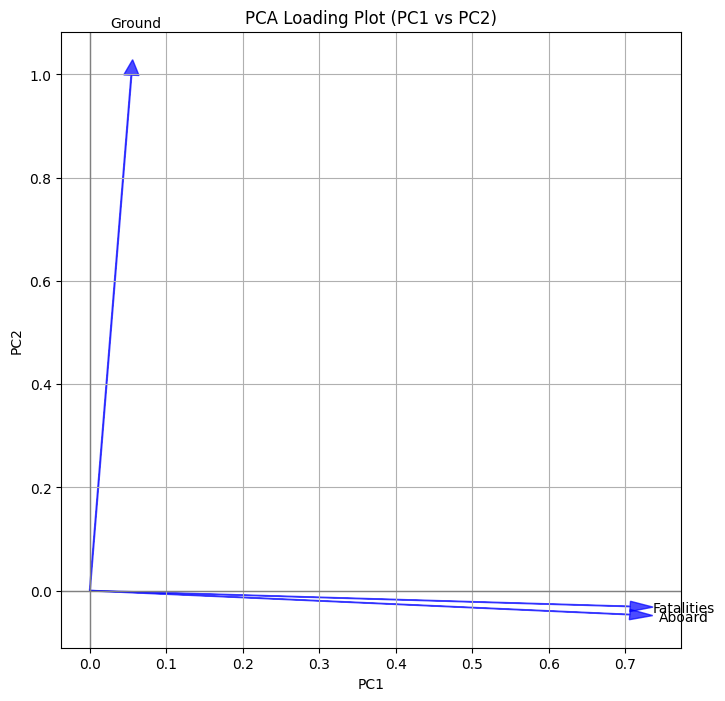

In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=quants)

plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Plot arrows
for i, feature in enumerate(loadings.index):
    plt.arrow(0, 0,
              loadings.iloc[i, 0],  # PC1
              loadings.iloc[i, 1],  # PC2
              color='blue', alpha=0.7, head_width=0.02)
    plt.text(loadings.iloc[i, 0]*1.1,
             loadings.iloc[i, 1]*1.1,
             feature, color='black', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loading Plot (PC1 vs PC2)')
plt.grid(True)
plt.show()

In [ ]:
# Get variable contributions to each component
mca_col_contrib = mca.column_contributions_

# Show top contributors to each axis
mca_contributions = {}
for i in range(mca_col_contrib.shape[1]):
    contrib = mca_col_contrib.iloc[:, i].sort_values(ascending=False)
    mca_contributions[f'MCA{i+1}'] = contrib.head(5)

mca_contributions

{'MCA1': Country__United States      0.114342
 Continent__North America    0.105819
 FederalSubject__Unknown     0.037221
 DayPeriod__Unknown          0.023498
 CauseCategory__Weather      0.021516
 Name: 0, dtype: float64,
 'MCA2': LocationType__Watery    0.138808
 Country__Unknown        0.074222
 Continent__Unknown      0.058805
 WaterBodyType__Ocean    0.057390
 WaterBodyType__Gulf     0.050186
 Name: 1, dtype: float64,
 'MCA3': Continent__Unknown                  0.079654
 Country__Unknown                    0.063871
 WaterBodyType__Gulf                 0.052871
 WaterBodyName__Karabogazgol Bay,    0.040908
 Type__Mil Mi-8T (helicopter)        0.040908
 Name: 2, dtype: float64,
 'MCA4': Country__Turkmenistan               0.087270
 Type__Mil Mi-8T (helicopter)        0.087270
 Operator__Akhal Air                 0.087270
 WaterBodyName__Karabogazgol Bay,    0.087270
 Country__Nevada                     0.044082
 Name: 3, dtype: float64,
 'MCA5': Operator__United Air Lines / Milita

In [ ]:
import pandas as pd

# Get variable contributions to each component
mca_col_contrib = mca.column_contributions_

# Create a DataFrame to store top contributors for each component
top_contributors = pd.DataFrame()

for i in range(mca_col_contrib.shape[1]):
    # Get top 5 contributors for current component
    top5 = mca_col_contrib.iloc[:, i].sort_values(ascending=False).head(5)

    # Create temporary DataFrame for current component
    temp_df = pd.DataFrame({
        f'MCA{i+1}': top5.index,
        f'MCA{i+1} Contribution%': top5.values.round(2) # Rename column
    })

    # Concatenate with main DataFrame
    top_contributors = pd.concat([top_contributors, temp_df], axis=1)

# Display the formatted table
top_contributors.style \
    .set_caption('Top 5 Variable Contributions per MCA Component') \
    .format({col: '{:.1f}%' for col in top_contributors.columns if 'Contribution%' in col}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold')]
    }])



---



# **Advance Analaysis**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTENC
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/test.csv")

In [ ]:
# Remove'Fatalities' and 'Ground' from train_df and test_df
# train_df = train_df.drop(columns=['Fatalities', 'Ground'])
# test_df = test_df.drop(columns=['Fatalities', 'Ground'])

In [ ]:
# Categorical Variables (qualitative / text-based or group identifiers) in cleanened dataset
cats = ['Year', 'Month', 'DayPeriod', 'Type', 'Operator', 'LocationType', 'Continent', 'Country', 'WaterBodyType', 'WaterBodyName',
        'FederalSubject', 'CauseCategory', 'WeatherCondition', 'FlightPhase', 'SurvivalSeverity']

# Quantitative Variables (numeric and measurable) in cleanened dataset
quants = ['Aboard', 'Fatalities', 'Ground']

# **Approach 1**: Using the **Initial Predictors**

**Part 1.1**: Applying **SMOTENC** (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Define categorical and quantitative columns (excluding the target)
categorical_cols = [col for col in cats if col != 'SurvivalSeverity']
quantitative_cols = quants

# Define categorical feature indices (based on encoded DataFrame)
X = train_df.drop(columns=['SurvivalSeverity'])  # predictors
y = train_df['SurvivalSeverity']                 # response

# Get column indices of categorical columns in X
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Convert X to numpy if not already
X_np = X.values

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_np, y)

# Optionally convert back to DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='SurvivalSeverity')

* Check the distribution of **SurvivalSeverity** after applying SMOTENC

In [ ]:
# Counts
severityCounts = y_resampled_df.value_counts().reset_index()
severityCounts.columns = ['SurvivalSeverity', 'Count']

# Plot
fig14 = px.pie(
    severityCounts,
    names='SurvivalSeverity',
    values='Count',
    title='Distribution of Survival Severity After Applying SMOTENC',
    labels={'SurvivalSeverity': 'Survival Severity', 'Count': 'No. of Crashes'}
)

fig14.update_layout(
    title_x=0.5
)

fig14.show()

In [ ]:
X_train = X_resampled_df
y_train = y_resampled_df

X_test = test_df.drop(columns=['SurvivalSeverity'])
y_test = test_df['SurvivalSeverity']

**Part 1.2**: Training Classification Models

*   **Baseline Model**: Multivariate Logistic Regression
*   **Tree Based Models**: Classification Trees, Random Forest, XGBoost

In [ ]:
# Define models with hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'], # Removed 'l1'
            'solver': ['liblinear'] # Removed 'saga' for L1 penalty incompatibility with ovr
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    }
}


# models = {
#     'Logistic Regression': {
#         'model': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
#         'params': {
#             'C': [0.1, 1, 10],
#             'penalty': ['l2'],
#             'solver': ['liblinear']
#         }
#     },
#     'Decision Tree': {
#         'model': DecisionTreeClassifier(random_state=42),
#         'params': {
#             'max_depth': [5, 10, 15],
#             'min_samples_split': [2, 5],
#             'min_samples_leaf': [1, 2],
#             'criterion': ['gini']
#         }
#     },
#     'Random Forest': {
#         'model': RandomForestClassifier(random_state=42),
#         'params': {
#             'n_estimators': [50, 100],
#             'max_depth': [5, 10, 15],
#             'min_samples_split': [2, 5],
#             'min_samples_leaf': [1, 2]
#         }
#     },
#     'XGBoost': {
#         'model': XGBClassifier(random_state=42, eval_metric='mlogloss', enable_categorical=True),
#         'params': {
#             'n_estimators': [50, 100],
#             'max_depth': [3, 4, 5],
#             'learning_rate': [0.01, 0.1],
#             'subsample': [0.8, 1.0]
#         }
#     },
#     'SVM': {
#         'model': SVC(random_state=42, probability=True),
#         'params': {
#             'C': [0.1, 1, 10],
#             'kernel': ['rbf'],
#             'gamma': ['scale']
#         }
#     },
#     'Neural Network': {
#         'model': MLPClassifier(random_state=42, max_iter=1000),
#         'params': {
#             'hidden_layer_sizes': [(50,), (100,)],
#             'activation': ['relu'],
#             'alpha': [0.0001, 0.001],
#             'learning_rate': ['constant']
#         }
#     }
# }

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Reduced folds

# Storage for results
trained_models = {}
results = {}

print("Starting hyperparameter tuning...")

# Identify categorical columns for encoding
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# One-hot encode training data for linear models
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, dummy_na=False)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, dummy_na=False)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Ordinal encode for tree-based models
class RobustOrdinalEncoder:
    def __init__(self):
        self.encoders = {}
        self.categories = {}

    def fit(self, X, cols):
        for col in cols:
            unique_values = X[col].unique()
            self.categories[col] = unique_values
            value_to_int = {v: i for i, v in enumerate(unique_values)}
            self.encoders[col] = value_to_int
        return self

    def transform(self, X, cols):
        X_transformed = X.copy()
        for col in cols:
            X_transformed[col] = X[col].map(self.encoders[col]).fillna(-1).astype(int)
        return X_transformed

ordinal_encoder = RobustOrdinalEncoder().fit(X_train, categorical_cols)
X_train_ordinal = ordinal_encoder.transform(X_train, categorical_cols)
X_test_ordinal = ordinal_encoder.transform(X_test, categorical_cols)

# Encode target variable for XGBoost
label_encoder = LabelEncoder()
y_train_xgb = label_encoder.fit_transform(y_train)
y_test_xgb = label_encoder.transform(y_test)

# Keep original y for other models
y_train_original = y_train.copy()
y_test_original = y_test.copy()

# Determine the complete set of unique classes from the combined train and test sets
# This ensures label_binarize has all possible classes
all_classes = sorted(pd.concat([y_train, y_test]).unique())

# Train and tune each model
for name, config in models.items():
    print(f"\nTraining {name}...")

    # Select appropriate data
    if name in ['Logistic Regression', 'SVM', 'Neural Network']:
        X_train_model = X_train_encoded
        X_test_model = X_test_encoded
        y_train_model = y_train_original
        y_test_model = y_test_original
    else:  # Tree-based models
        X_train_model = X_train_ordinal
        X_test_model = X_test_ordinal
        y_train_model = y_train_xgb if name == 'XGBoost' else y_train_original
        y_test_model = y_test_xgb if name == 'XGBoost' else y_test_original

    # Grid search
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train_model, y_train_model)

    # Store best model
    best_model = grid_search.best_estimator_
    trained_models[name] = best_model

    # Make predictions (convert back for XGBoost)
    if name == 'XGBoost':
        y_train_pred = label_encoder.inverse_transform(best_model.predict(X_train_model))
        y_test_pred = label_encoder.inverse_transform(best_model.predict(X_test_model))
        y_train_pred_proba = best_model.predict_proba(X_train_model)
        y_test_pred_proba = best_model.predict_proba(X_test_model)
    else:
        y_train_pred = best_model.predict(X_train_model)
        y_test_pred = best_model.predict(X_test_model)  # Class predictions
        y_train_pred_proba = best_model.predict_proba(X_train_model)
        y_test_pred_proba = best_model.predict_proba(X_test_model)

    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred,
        'y_train_pred_proba': y_train_pred_proba,
        'y_test_pred_proba': y_test_pred_proba
    }

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

print("\nHyperparameter tuning completed!")

# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name, original_columns=None):
    """
    Parameters:
    - model: trained model
    - feature_names: list of feature names from the model
    - model_name: name of the model for title
    - original_columns: list of original predictor variables (before one-hot encoding)
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Handle multi-class coefficients for linear models
        if model.coef_.ndim > 1:
            importances = np.abs(model.coef_).mean(axis=0)
        else:
            importances = np.abs(model.coef_)
    else:
        print(f"Feature importance not available for {model_name}")
        return None

    # For logistic regression with one-hot encoded features
    if model_name == 'Logistic Regression' and original_columns is not None:
        # Create a mapping from original columns to their one-hot encoded versions
        importance_dict = {}
        for orig_col in original_columns:
            # Find all one-hot encoded columns that start with this original column name
            encoded_cols = [f for f in feature_names if f.startswith(orig_col)]
            if encoded_cols:
                # Sum the importances for all one-hot encoded versions of this variable
                col_indices = [list(feature_names).index(col) for col in encoded_cols]
                importance_dict[orig_col] = np.sum(importances[col_indices])
            else:
                # For non-categorical variables that weren't one-hot encoded
                if orig_col in feature_names:
                    importance_dict[orig_col] = importances[list(feature_names).index(orig_col)]

        # Create DataFrame from the aggregated importances
        importance_df = pd.DataFrame({
            'feature': list(importance_dict.keys()),
            'importance': list(importance_dict.values())
        }).sort_values('importance', ascending=True)
    else:
        # For other models, use the features as-is
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=True)

    # Plot
    fig = go.Figure(go.Bar(
        x=importance_df['importance'],
        y=importance_df['feature'],
        orientation='h',
        marker_color='lightblue'
    ))

    fig.update_layout(
        title=f'Feature Importance - {model_name}',
        xaxis_title='Importance',
        yaxis_title='Features',
        height=max(400, len(importance_df) * 20)
    )

    return fig

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    # Ensure predictions are class labels, not probabilities
    if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
        y_pred = [classes[i] for i in y_pred]  # Map to class names

    cm = confusion_matrix(y_true, y_pred, labels=classes) # Specify labels to ensure order

    # Create annotated heatmap
    fig = ff.create_annotated_heatmap(
        z=cm,
        x=[f'Pred_{cls}' for cls in classes],
        y=[f'True_{cls}' for cls in classes],
        annotation_text=cm,
        colorscale='Blues',
        showscale=True
    )

    fig.update_layout(
        title=title,
        xaxis_title='Predicted',
        yaxis_title='Actual'
    )

    return fig

# Function to plot ROC curves
def plot_roc_curves(y_true, y_pred_proba, classes, title):
    # Binarize the output
    y_true_bin = label_binarize(y_true, classes=classes)
    n_classes = len(classes)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Ensure y_pred_proba has columns for all classes in the specified 'classes' order
    # If a class is missing in predictions, its probability column might be missing.
    # We need to handle this to align y_pred_proba with y_true_bin.

    # Get the order of classes from the model if available, otherwise assume the order in 'classes'
    if hasattr(y_pred_proba, 'classes_'):
        pred_proba_classes = list(y_pred_proba.classes_)
    else:
         # If predict_proba output is a numpy array, we need to know the column order.
         # This is tricky. Let's assume the order is the same as 'classes' for now,
         # but the previous fix for model.classes_ should handle most cases.
         # If this still fails, we might need to inspect the model's predict_proba output more carefully.
         pred_proba_classes = classes # Assuming order matches the input 'classes'


    # Reorder columns of y_pred_proba to match the order in 'classes'
    # Create a mapping from the model's class order to the desired 'classes' order
    col_order = [pred_proba_classes.index(c) for c in classes if c in pred_proba_classes]

    # Handle cases where some classes might be missing in the model's predict_proba output
    # This should ideally not happen if training was done correctly, but as a safeguard:
    if len(col_order) != n_classes:
        print(f"Warning: Mismatch between specified classes ({n_classes}) and predict_proba columns ({len(pred_proba_classes)}). Cannot plot ROC curves accurately.")
        return None # Return None if ROC plot cannot be generated


    y_pred_proba_ordered = y_pred_proba[:, col_order]


    for i in range(n_classes):
        # Handle the case where a class might have 0 true instances in the current subset
        if np.sum(y_true_bin[:, i]) == 0:
             roc_auc[i] = np.nan # AUC is not defined
             fpr[i], tpr[i] = [0, 1], [0, 1] # Plot a diagonal line or skip
             print(f"Warning: Class '{classes[i]}' has no true instances. Cannot calculate AUC.")
             continue

        # Handle the case where a class might have 0 predicted instances (or all predictions are 0 or 1)
        try:
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba_ordered[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        except ValueError as e:
            print(f"Could not compute ROC curve for class '{classes[i]}': {e}")
            roc_auc[i] = np.nan
            fpr[i], tpr[i] = [0, 1], [0, 1] # Plot a diagonal line


    # Plot ROC curves
    fig = go.Figure()

    colors = px.colors.qualitative.Set1

    for i, color in zip(range(n_classes), cycle(colors)):
        # Only plot if AUC was computable
        if not np.isnan(roc_auc[i]):
            fig.add_trace(go.Scatter(
                x=fpr[i],
                y=tpr[i],
                mode='lines',
                name=f'{classes[i]} (AUC = {roc_auc[i]:.2f})',
                line=dict(color=color, width=2)
            ))
        else:
             # Optionally plot a dashed line for classes with no true instances or issues
             fig.add_trace(go.Scatter(
                x=fpr[i],
                y=tpr[i],
                mode='lines',
                name=f'{classes[i]} (AUC = N/A)',
                line=dict(color=color, width=1, dash='dash')
            ))


    # Add diagonal line
    fig.add_trace(go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode='lines',
        name='Random',
        line=dict(color='black', width=1, dash='dash')
    ))

    fig.update_layout(
        title=title,
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        legend=dict(x=0.6, y=0.1)
    )

    return fig

# Get unique classes
# Ensure classes are derived from the combined train and test target for consistency
classes = sorted(pd.concat([y_train, y_test]).unique())

# Get original column names (before one-hot encoding)
original_columns = X_train.columns.tolist()

# Generate plots for each model
for name, model in trained_models.items():
    print(f"\nGenerating plots for {name}...")

    # Use appropriate feature names and original columns
    if name in ['Logistic Regression', 'SVM', 'Neural Network']:
        X_model_for_plots = X_train_encoded
        # For logistic regression, pass original columns to aggregate one-hot encoded features
        fig_importance = plot_feature_importance(
            model,
            X_model_for_plots.columns,
            name,
            original_columns=original_columns if name == 'Logistic Regression' else None
        )
    else:
        X_model_for_plots = X_train_ordinal if name != 'XGBoost' else X_train
        fig_importance = plot_feature_importance(model, X_model_for_plots.columns, name)

    if fig_importance:
        fig_importance.show()

    # Confusion matrices
    fig_cm_train = plot_confusion_matrix(
        y_train, results[name]['y_train_pred'], classes,
        f'Confusion Matrix (Train) - {name}'
    )
    fig_cm_train.show()

    fig_cm_test = plot_confusion_matrix(
        y_test, results[name]['y_test_pred'], classes,
        f'Confusion Matrix (Test) - {name}'
    )
    fig_cm_test.show()

    # ROC curves
    # Ensure y_pred_proba has the correct shape and order of classes
    # The plot_roc_curves function will now handle the reordering internally
    fig_roc_train = plot_roc_curves(
        y_train, results[name]['y_train_pred_proba'], classes,
        f'ROC Curves (Train) - {name}'
    )
    if fig_roc_train:
        fig_roc_train.show()


    fig_roc_test = plot_roc_curves(
        y_test, results[name]['y_test_pred_proba'], classes,
        f'ROC Curves (Test) - {name}'
    )
    if fig_roc_test:
        fig_roc_test.show()


# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_pred_proba, classes, model_name=None):
    """
    Calculate classification metrics.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - y_pred_proba: Predicted probabilities
    - classes: List of all possible classes
    - model_name: Name of the model (optional)
    """
    # Convert to pandas Categorical to ensure consistent handling
    y_true_cat = pd.Categorical(y_true, categories=classes)
    y_pred_cat = pd.Categorical(y_pred, categories=classes)

    accuracy = accuracy_score(y_true_cat, y_pred_cat)
    precision = precision_score(y_true_cat, y_pred_cat, average='weighted', zero_division=0)
    recall = recall_score(y_true_cat, y_pred_cat, average='weighted', zero_division=0)
    f1 = f1_score(y_true_cat, y_pred_cat, average='weighted', zero_division=0)

    # Initialize AUC as NaN (will compute if possible)
    auc_score = np.nan

    # Only compute AUC if we have probability predictions and more than one class
    if y_pred_proba is not None and len(classes) > 1:
        try:
            y_true_bin = label_binarize(y_true_cat, classes=classes)

            # Get the model to check class order if available
            model = trained_models.get(model_name) if model_name else None

            if model and hasattr(model, 'classes_'):
                model_classes = list(model.classes_)
                # Reorder probabilities to match the classes order
                col_order = [model_classes.index(c) for c in classes if c in model_classes]
                if len(col_order) == len(classes):
                    y_pred_proba_ordered = y_pred_proba[:, col_order]
                    auc_score = roc_auc_score(y_true_bin, y_pred_proba_ordered,
                                            average='weighted', multi_class='ovr')
            else:
                # Fallback: assume probabilities are in same order as classes
                if y_pred_proba.shape[1] == len(classes):
                    auc_score = roc_auc_score(y_true_bin, y_pred_proba,
                                            average='weighted', multi_class='ovr')
        except ValueError as e:
            print(f"Could not calculate AUC for {model_name}: {e}")

    return accuracy, precision, recall, f1, auc_score

# Calculate metrics for all models
metrics_data = []

for name in trained_models.keys():
    # Training metrics
    train_acc, train_prec, train_rec, train_f1, train_auc = calculate_metrics(
        y_train,
        results[name]['y_train_pred'],
        results[name]['y_train_pred_proba'],
        classes,
        model_name=name  # Pass the model name explicitly
    )

    # Testing metrics
    test_acc, test_prec, test_rec, test_f1, test_auc = calculate_metrics(
        y_test,
        results[name]['y_test_pred'],
        results[name]['y_test_pred_proba'],
        classes,
        model_name=name  # Pass the model name explicitly
    )

    metrics_data.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Train_Precision': train_prec,
        'Train_Recall': train_rec,
        'Train_F1': train_f1,
        'Train_AUC': train_auc,
        'Test_Accuracy': test_acc,
        'Test_Precision': test_rec,
        'Test_Recall': test_prec,
        'Test_F1': test_f1,
        'Test_AUC': test_auc
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(metrics_data)

# Round to 4 decimal places
numeric_cols = [col for col in comparison_df.columns if col != 'Model']
comparison_df[numeric_cols] = comparison_df[numeric_cols].round(4)

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))

# Find best model based on test recall
best_model_idx = comparison_df['Test_Recall'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

print(f"\n" + "="*50)
print(f"BEST MODEL: {best_model_name}")
print("="*50)
print(f"Test Accuracy: {comparison_df.loc[best_model_idx, 'Test_Accuracy']:.4f}")
print(f"Test Precision: {comparison_df.loc[best_model_idx, 'Test_Precision']:.4f}")
print(f"Test Recall: {comparison_df.loc[best_model_idx, 'Test_Recall']:.4f}")
print(f"Test F1 Score: {comparison_df.loc[best_model_idx, 'Test_F1']:.4f}")
print(f"Test AUC: {comparison_df.loc[best_model_idx, 'Test_AUC']:.4f}")

# Save results
comparison_df.to_csv('model_comparison_results.csv', index=False)
print(f"\nResults saved to 'model_comparison_results.csv'")

# Display final comparison table as an interactive plot
fig_comparison = go.Figure(data=[go.Table(
    header=dict(values=list(comparison_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[comparison_df[col] for col in comparison_df.columns],
               fill_color='lavender',
               align='left'))
])

fig_comparison.update_layout(title="Model Performance Comparison Table")
fig_comparison.show()

Starting hyperparameter tuning...

Training Logistic Regression...
Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score: 0.8940

Training Decision Tree...
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV score: 0.9432

Training Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best CV score: 0.8944

Training XGBoost...
Best parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best CV score: 0.9608

Hyperparameter tuning completed!

Generating plots for Logistic Regression...



Generating plots for Decision Tree...



Generating plots for Random Forest...



Generating plots for XGBoost...



MODEL PERFORMANCE COMPARISON
              Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Train_AUC  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC
Logistic Regression          0.9980           0.9980        0.9980    0.9980     1.0000         0.3405          0.3405       0.6366   0.2080    0.5635
      Decision Tree          0.9697           0.9713        0.9697    0.9697     0.9965         0.8861          0.8861       0.8852   0.8853    0.9037
      Random Forest          0.9294           0.9412        0.9294    0.9287     0.9945         0.7772          0.7772       0.7832   0.7523    0.8528
            XGBoost          1.0000           1.0000        1.0000    1.0000        NaN         0.9389          0.9389       0.9392   0.9381       NaN

BEST MODEL: XGBoost
Test Accuracy: 0.9389
Test Precision: 0.9389
Test Recall: 0.9392
Test F1 Score: 0.9381
Test AUC: nan

Results saved to 'model_comparison_results.csv'


**Part 1.3**: Selecting features covering **90% importance**

In [ ]:
model = trained_models['XGBoost']
importances = model.feature_importances_
feature_names = X_train_ordinal.columns

# Create a DataFrame and sort
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

# Calculate cumulative importance
importance_df['cumulative'] = importance_df['importance'].cumsum()

# Select features covering 90% importance
selected_features = importance_df[importance_df['cumulative'] <= 0.9]['feature'].tolist()
print("Selected features:", selected_features)

Selected features: ['Fatalities', 'Aboard', 'Ground', 'FlightPhase', 'WaterBodyType', 'WeatherCondition', 'DayPeriod', 'CauseCategory']


**Part 1.4**: Retrain the **XGBoost** model with **selected features**

In [ ]:
# Prepare Reduced Feature Data

# For tree-based models (using ordinal encoded data)
X_train_reduced = X_train_ordinal[selected_features]
X_test_reduced = X_test_ordinal[selected_features]

# Train Reduced Feature XGBoost Model (Use same hyperparameters as best original model)
best_params = results['XGBoost']['best_params']

reduced_xgb = XGBClassifier(**best_params, random_state=42, eval_metric='mlogloss')
reduced_xgb.fit(X_train_reduced, y_train_xgb)

# Make predictions
y_train_pred_reduced = label_encoder.inverse_transform(reduced_xgb.predict(X_train_reduced))
y_test_pred_reduced = label_encoder.inverse_transform(reduced_xgb.predict(X_test_reduced))
y_train_proba_reduced = reduced_xgb.predict_proba(X_train_reduced)
y_test_proba_reduced = reduced_xgb.predict_proba(X_test_reduced)

# Generate Evaluation Metrics and Plots

# Training set confusion matrix
fig_cm_train_reduced = plot_confusion_matrix(
    y_train, y_train_pred_reduced, classes,
    'Confusion Matrix (Train) - Reduced XGBoost'
)
fig_cm_train_reduced.show()

# Test set confusion matrix
fig_cm_test_reduced = plot_confusion_matrix(
    y_test, y_test_pred_reduced, classes,
    'Confusion Matrix (Test) - Reduced XGBoost'
)
fig_cm_test_reduced.show()

# Training set ROC
fig_roc_train_reduced = plot_roc_curves(
    y_train, y_train_proba_reduced, classes,
    'ROC Curves (Train) - Reduced XGBoost'
)
fig_roc_train_reduced.show()

# Test set ROC
fig_roc_test_reduced = plot_roc_curves(
    y_test, y_test_proba_reduced, classes,
    'ROC Curves (Test) - Reduced XGBoost'
)
fig_roc_test_reduced.show()

# Create comprehensive comparison table
full_comparison = pd.DataFrame({
    'Model': ['XGBoost (Full)', 'XGBoost (Reduced)'],
    # Training metrics
    'Train_Accuracy': [1.0000, accuracy_score(y_train, y_train_pred_reduced)],
    'Train_Precision': [1.0000, precision_score(y_train, y_train_pred_reduced, average='weighted')],
    'Train_Recall': [1.0000, recall_score(y_train, y_train_pred_reduced, average='weighted')],
    'Train_F1': [1.0000, f1_score(y_train, y_train_pred_reduced, average='weighted')],
    'Train_AUC': [np.nan, roc_auc_score(label_binarize(y_train, classes=classes),
                               y_train_proba_reduced, average='weighted', multi_class='ovr')],
    # Test metrics
    'Test_Accuracy': [0.9337, accuracy_score(y_test, y_test_pred_reduced)],
    'Test_Precision': [0.9366, precision_score(y_test, y_test_pred_reduced, average='weighted')],
    'Test_Recall': [0.9366, recall_score(y_test, y_test_pred_reduced, average='weighted')],
    'Test_F1': [0.9346, f1_score(y_test, y_test_pred_reduced, average='weighted')],
    'Test_AUC': [np.nan, roc_auc_score(label_binarize(y_test, classes=classes),
                               y_test_proba_reduced, average='weighted', multi_class='ovr')],
    'Num_Features': [X_train_ordinal.shape[1], len(selected_features)]
})

print("\nXGBoost Model Comparison:")
print(full_comparison.round(4).to_string(index=False))


XGBoost Model Comparison:
            Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Train_AUC  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC  Num_Features
   XGBoost (Full)          1.0000           1.0000        1.0000    1.0000        NaN         0.9337          0.9366       0.9366   0.9346       NaN            17
XGBoost (Reduced)          0.9989           0.9989        0.9989    0.9989        1.0         0.9669          0.9668       0.9669   0.9668    0.9889             8




*   **Best Model** Determination (Focus on **Recall** for "None Survived" to avoid **missing fatal crashes**)




In [ ]:
# Compare test recall
if full_comparison.loc[1, 'Test_Recall'] >= full_comparison.loc[0, 'Test_Recall']:
    best_model = reduced_xgb
    best_model_type = "Reduced Feature XGBoost"
    print("\nCONCLUSION: Reduced feature model performs equal or better!")
else:
    best_model = trained_models['XGBoost']
    best_model_type = "Full Feature XGBoost"
    print("\nCONCLUSION: Original model performs better")

print(f"\nBest Model: {best_model_type}")
print(f"Test Recall: {max(full_comparison['Test_Recall']):.4f}")
print(f"Number of Features: {best_model.n_features_in_ if hasattr(best_model, 'n_features_in_') else len(selected_features)}")

# Feature importance of best model
fig_importance = plot_feature_importance(
    best_model,
    selected_features if best_model_type == "Reduced Feature XGBoost" else X_train_ordinal.columns,
    best_model_type
)
fig_importance.show()


CONCLUSION: Reduced feature model performs equal or better!

Best Model: Reduced Feature XGBoost
Test Recall: 0.9669
Number of Features: 8


In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save the retrained XGBoost model in MyDrive/Colab Notebooks/Data Analysis Project 1
joblib.dump(reduced_xgb, '/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/survival_severity_xgb.joblib')
print("XGBoost model saved as 'survival_severity_xgb.joblib'")

XGBoost model saved as 'survival_severity_xgb.joblib'


In [ ]:
# Save the encodeers
joblib.dump(label_encoder, '/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/label_encoder.joblib')
print("Label encoder saved as 'label_encoder.joblib'")

joblib.dump(ordinal_encoder, '/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/ordinal_encoder.joblib')
print("Ordinal encoder saved as 'ordinal_encoder.joblib'")

Label encoder saved as 'label_encoder.joblib'
Ordinal encoder saved as 'ordinal_encoder.joblib'


In [ ]:
# Save feature names
joblib.dump(selected_features, '/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/selected_features.joblib')
print("Selected features saved as 'selected_features.joblib'")

Selected features saved as 'selected_features.joblib'


**Part 1.5**: Interpreting the XGBoost with **SHAP** (SHapley Additive exPlanations)

In [ ]:
!pip install shap

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [ ]:
import shap

* **Global** Interpretation: SHAP **summary plots**

In [ ]:
print("Class mappings:", label_encoder.classes_)

Class mappings: ['All Survived' 'None Survived' 'Partial Survived']


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Compute SHAP values (using your existing code)
selected_features = ['Fatalities', 'Aboard', 'Ground', 'FlightPhase',
                    'WaterBodyType', 'WeatherCondition', 'DayPeriod', 'CauseCategory']
X_selected = X_train_ordinal[selected_features]
explainer = shap.TreeExplainer(reduced_xgb)
shap_values = explainer.shap_values(X_selected)  # List of arrays [class0, class1, class2]

# 2. Get class names from label_encoder
class_names = label_encoder.classes_  # e.g., ['All Survived', 'None Survived', 'Partial Survived']

# 3. Prepare data for Plotly
mean_abs_shap = np.abs(shap_values).mean(axis=1)  # Mean |SHAP| per class
feature_order = np.argsort(mean_abs_shap.sum(axis=0))[::-1]  # Sort features by total importance

# 4. Create interactive plot
fig = make_subplots(rows=1, cols=len(class_names),
                   subplot_titles=[f"<b>{name}</b>" for name in class_names])

for i, class_name in enumerate(class_names):
    # Sort features by importance for this class
    idx = np.argsort(mean_abs_shap[i])[::-1]

    fig.add_trace(
        go.Bar(
            x=mean_abs_shap[i][idx],
            y=[selected_features[j] for j in idx],
            orientation='h',
            name=class_name,
            marker_color=['#00CC96', '#EF553B', '#636EFA'][i]  # Red/Blue/Green
        ),
        row=1, col=i+1
    )

# Update layout
fig.update_layout(
    title_text="<b>Global SHAP Feature Importance by Survival Class</b>",
    height=500,
    showlegend=False,
    xaxis_title="Mean |SHAP Value| (Impact on Prediction)"
)
fig.update_yaxes(title_text="Features", tickangle=-45)
fig.show()

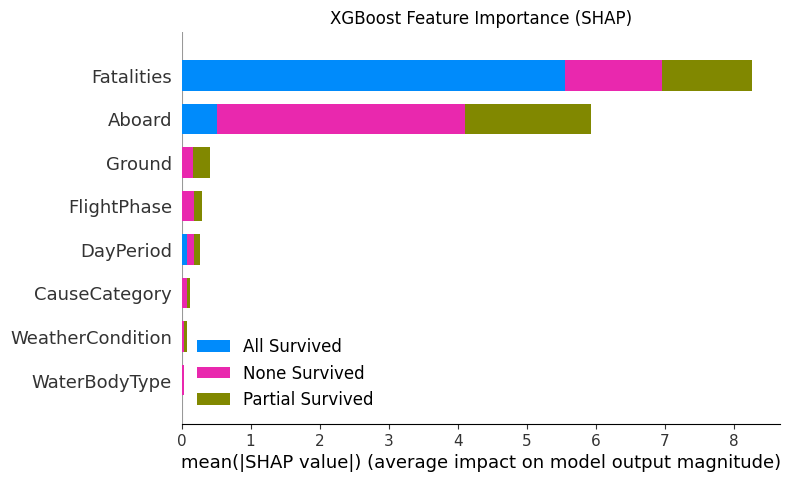

In [ ]:
# Prepare data with selected features
selected_features = ['Fatalities', 'Aboard', 'Ground', 'FlightPhase', 'WaterBodyType', 'WeatherCondition', 'DayPeriod', 'CauseCategory']
X_selected = X_train_ordinal[selected_features]  # Using ordinal encoded data

# Create SHAP explainer
explainer = shap.TreeExplainer(reduced_xgb)
shap_values = explainer.shap_values(X_selected)


# Global feature importance
shap.summary_plot(shap_values, X_selected, plot_type="bar", class_names = label_encoder.classes_, show=False)
plt.title("XGBoost Feature Importance (SHAP)")
plt.show()

**Part 1.6**: Interpreting the XGBoost with **PDPs** (Partial Dependence Plots)

In [ ]:
!pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
import pdpbox

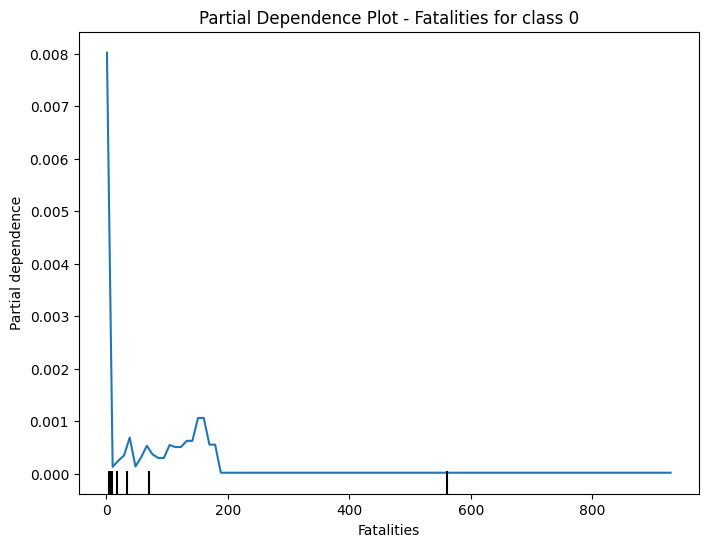

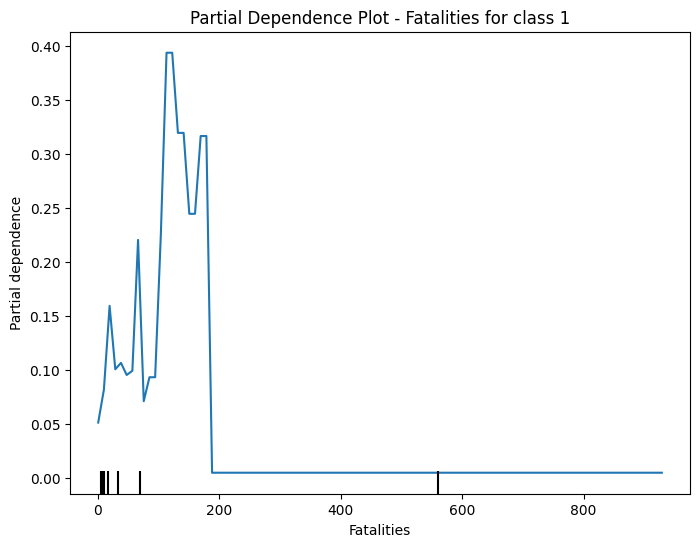

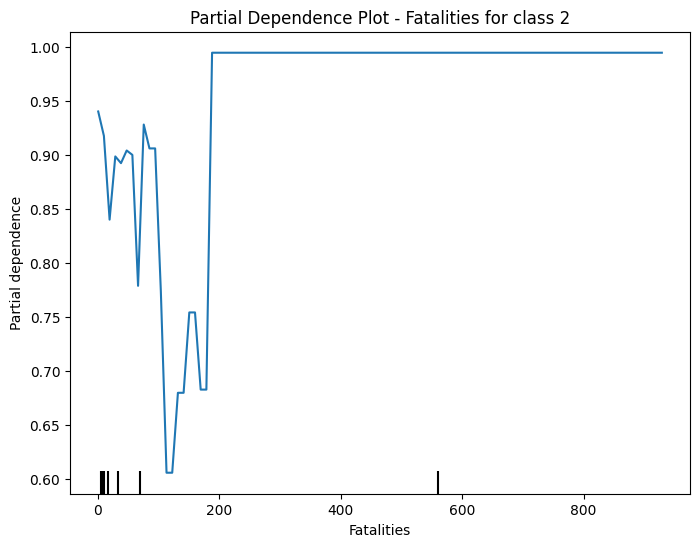

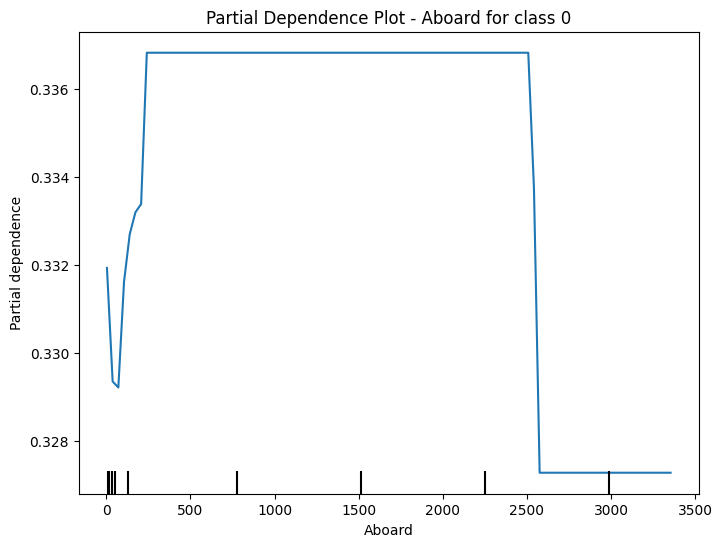

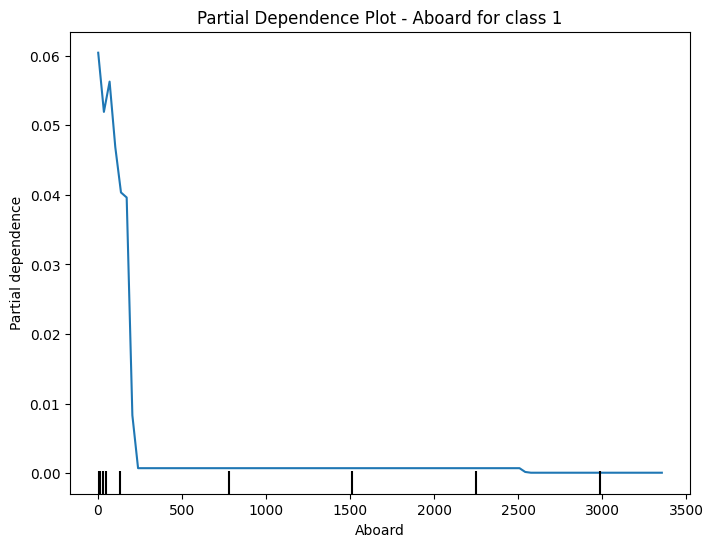

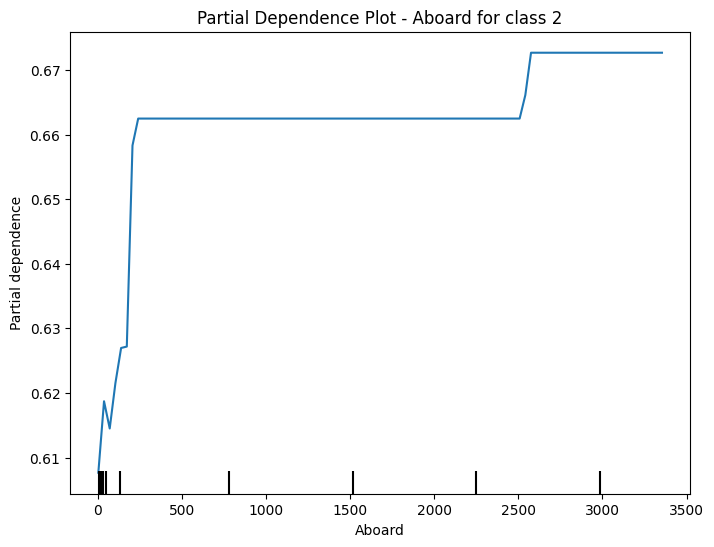

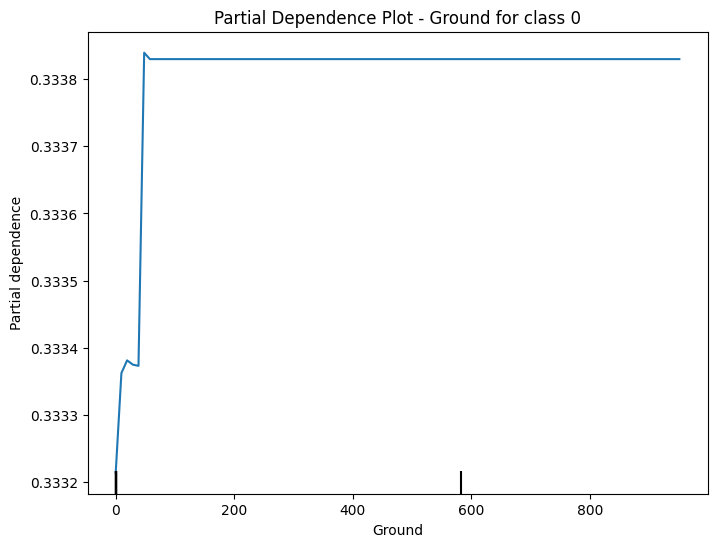

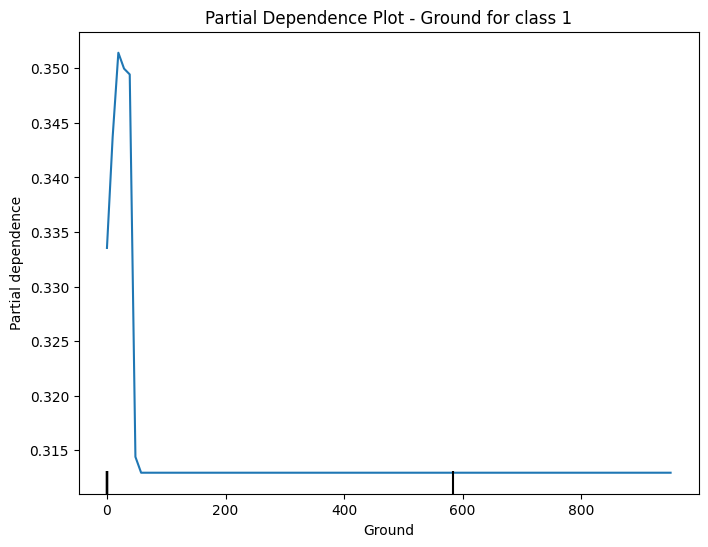

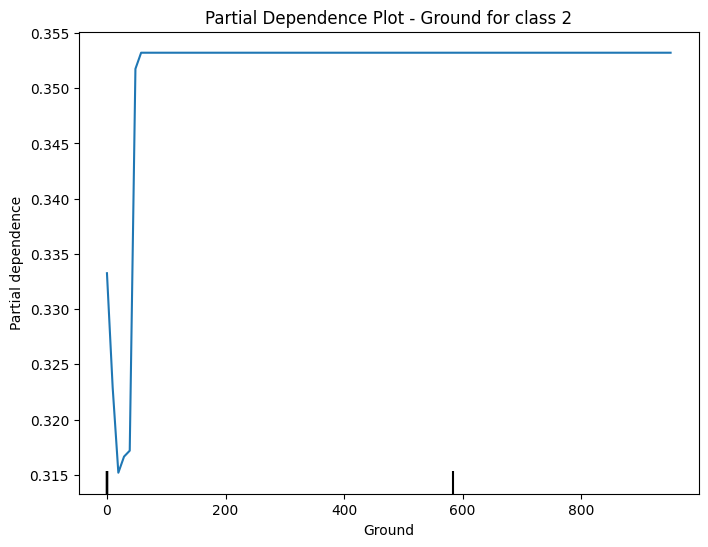

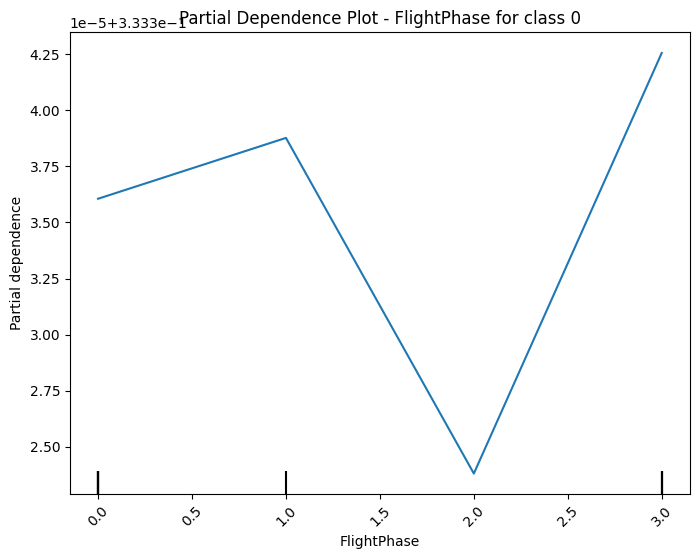

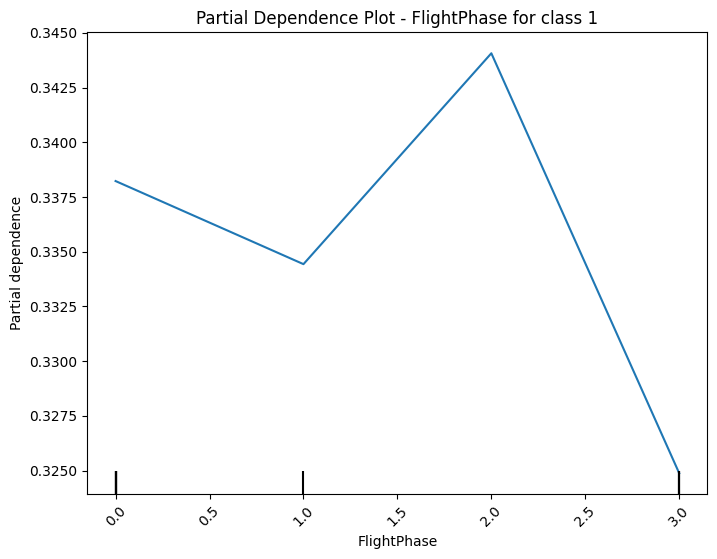

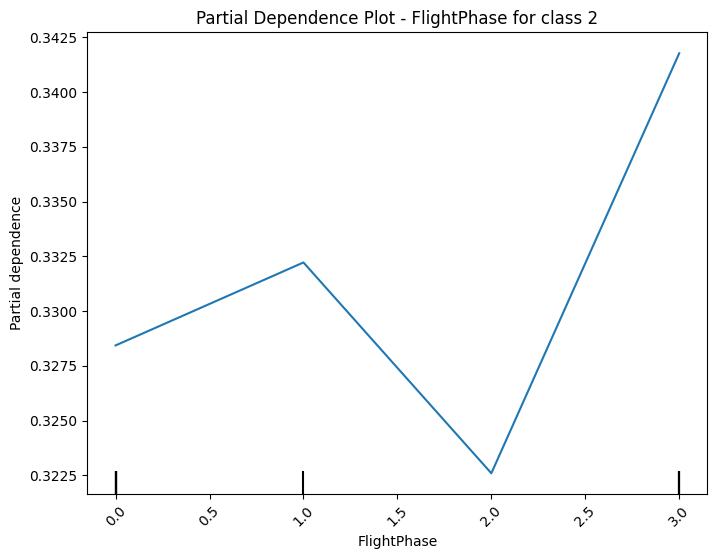

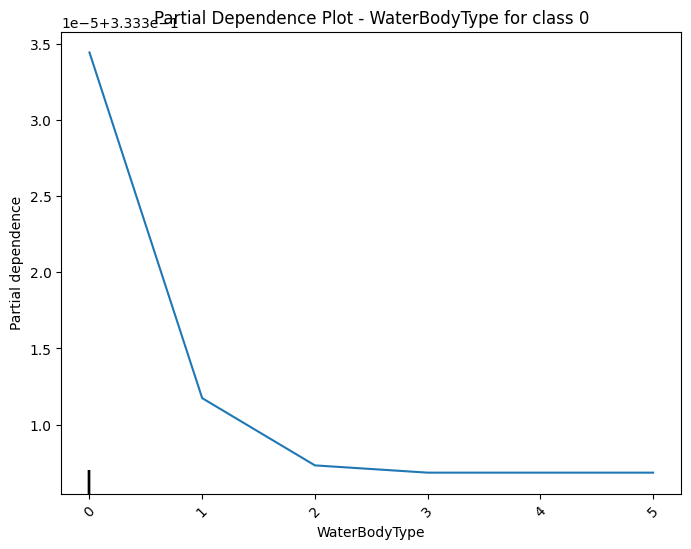

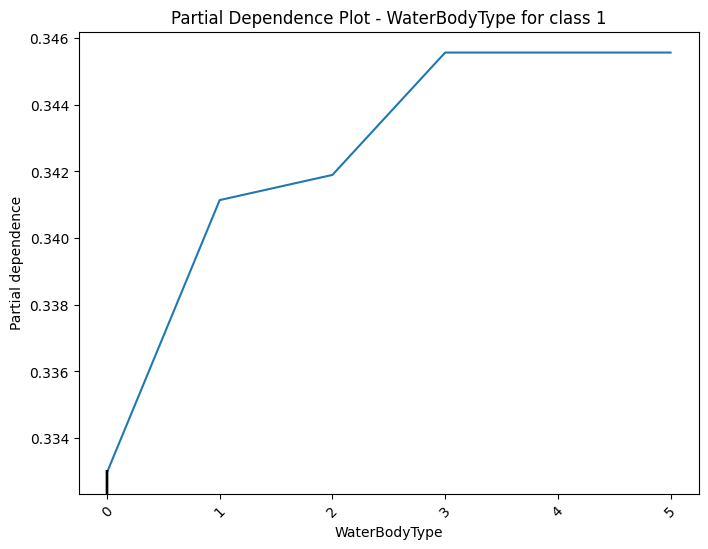

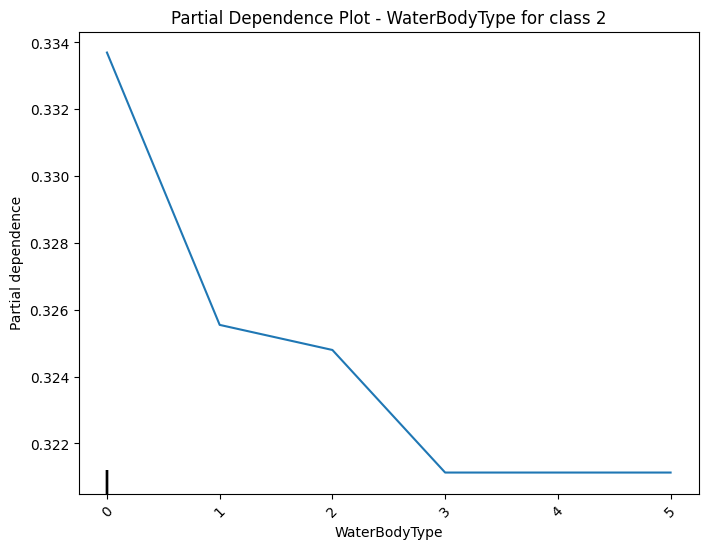

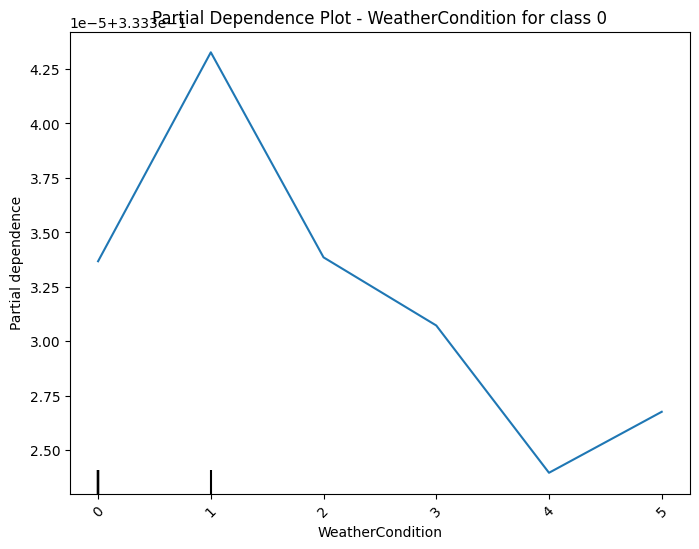

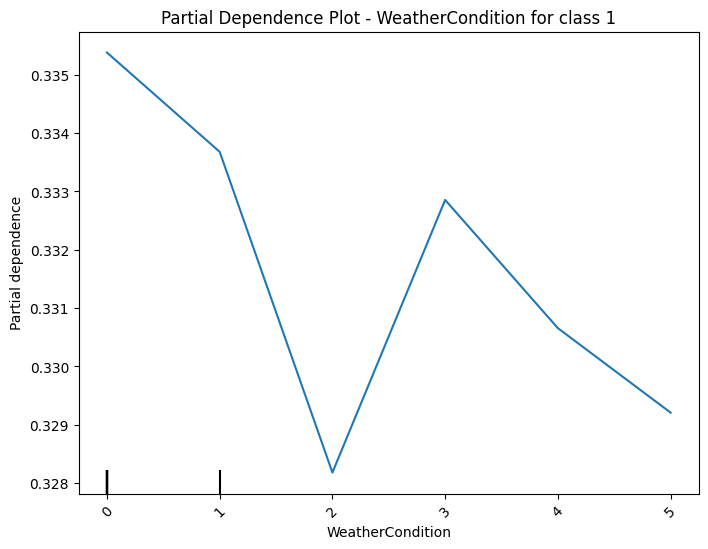

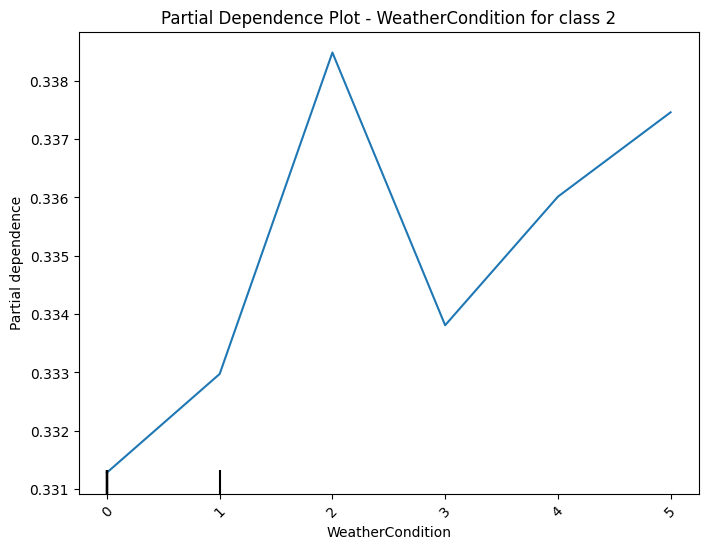

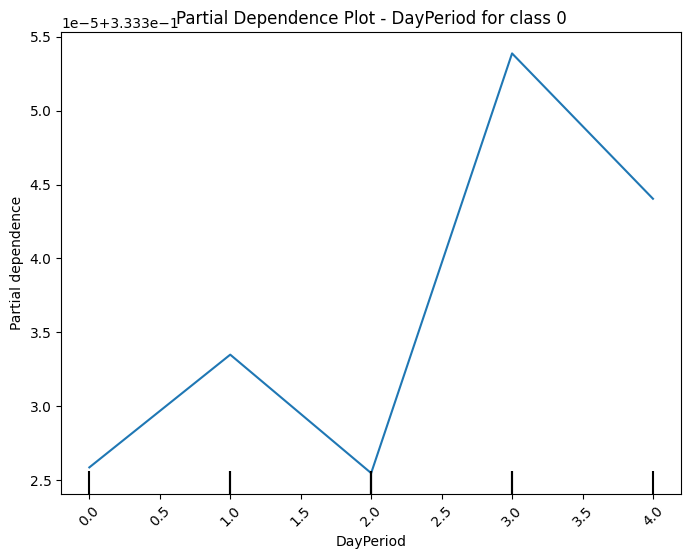

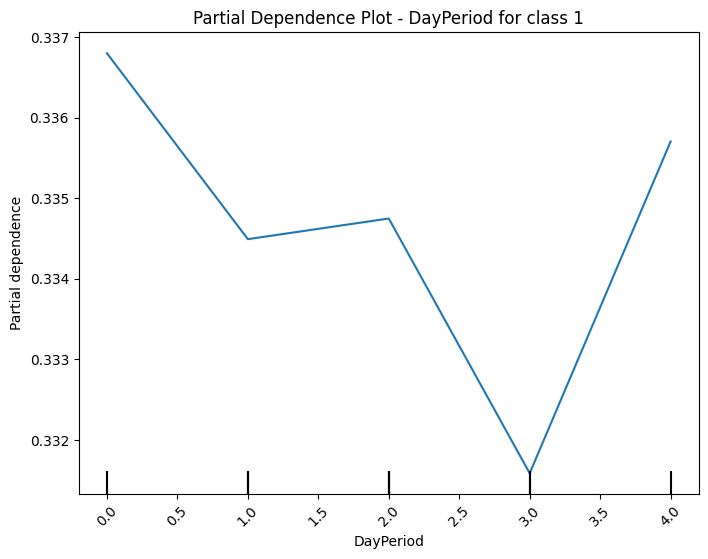

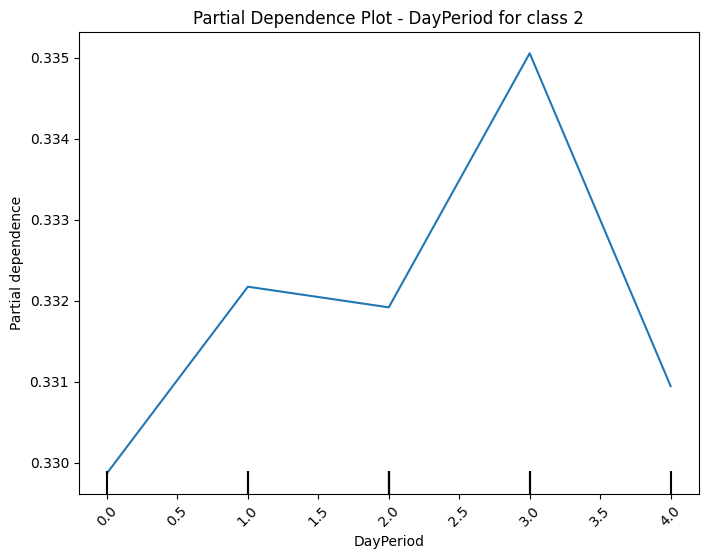

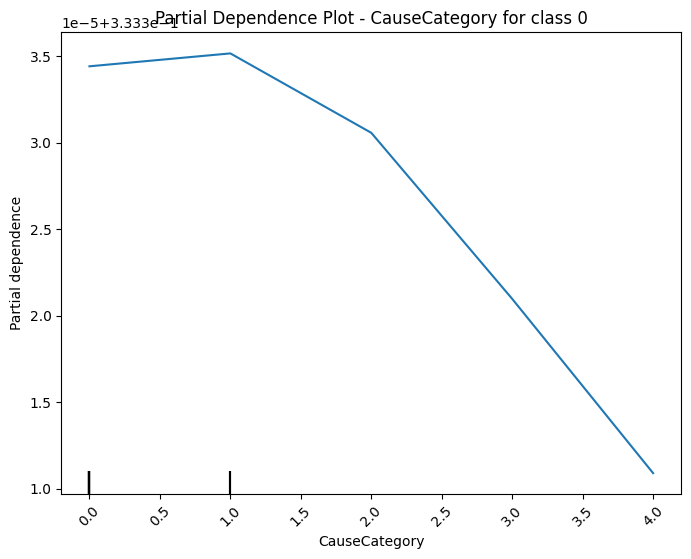

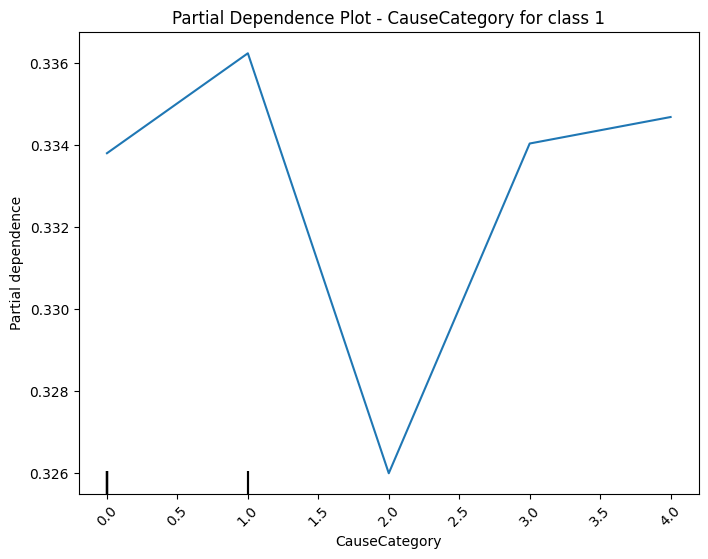

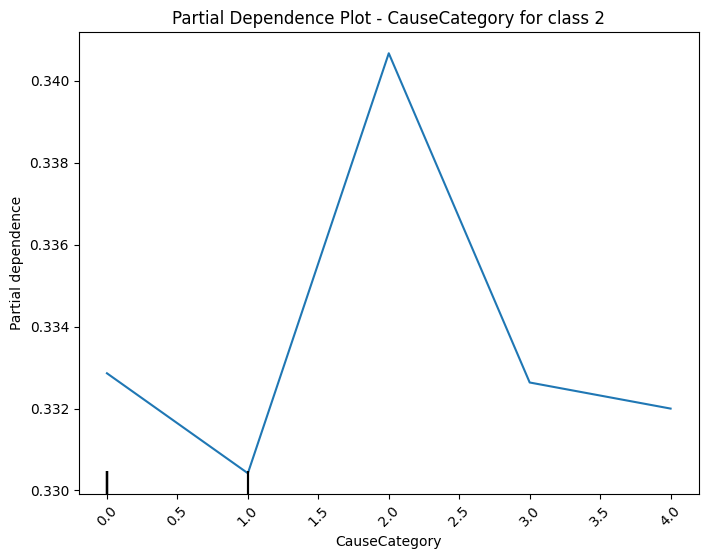

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# For numeric features
for feature in ['Fatalities', 'Aboard', 'Ground']:
    for target_class in reduced_xgb.classes_:
        fig, ax = plt.subplots(figsize=(8, 6))
        display = PartialDependenceDisplay.from_estimator(
            estimator=reduced_xgb,
            X=X_train_ordinal[selected_features],
            features=[feature],
            target=target_class,
            ax=ax
        )
        ax.set_title(f"Partial Dependence Plot - {feature} for class {target_class}")
        plt.show()

# For categorical features
for feature in ['FlightPhase', 'WaterBodyType', 'WeatherCondition', 'DayPeriod', 'CauseCategory']:
    for target_class in reduced_xgb.classes_:
        fig, ax = plt.subplots(figsize=(8, 6))
        display = PartialDependenceDisplay.from_estimator(
            estimator=reduced_xgb,
            X=X_train_ordinal[selected_features],
            features=[feature],
            target=target_class,
            ax=ax
        )
        ax.set_title(f"Partial Dependence Plot - {feature} for class {target_class}")
        plt.xticks(rotation=45)
        plt.show()



---



# **Approach 2**: Using the **Interpreted PCA-MCA Componets**

In [ ]:
X_combined

PC1       PC2       PC3      MCA1      MCA2      MCA3      MCA4  \
0    -0.826636  0.015238  0.013376  0.797845  0.042923 -0.522327  0.050649   
1    -0.692507  0.008345  0.049305 -0.662042  4.169888 -2.357084  0.269399   
2    -0.843011  0.016312  0.029774  0.372544  0.337403  0.344302 -0.436536   
3    -0.255625 -0.016020 -0.005137 -0.561826  2.443562 -0.097893 -1.222842   
4     0.248139 -0.041445  0.171378 -0.661289  0.321114 -0.017577 -0.749523   
...        ...       ...       ...       ...       ...       ...       ...   
5231 -0.203371 -0.017546  0.112783 -0.363301 -0.275942 -0.039914  0.210027   
5232  3.037954 -0.154946  0.273431 -0.348935 -0.208481  0.143126  0.248898   
5233  7.698054 -0.435787  1.138194 -0.401929  2.809226 -1.263429 -0.039367   
5234 -0.843011  0.016312  0.029774  0.497853  0.146393 -0.251139  0.099574   
5235 -0.391501 -0.007588  0.088369 -0.275679 -0.110846  0.118450  0.175021   

          MCA5  SurvivalSeverity  
0    -0.231369  Partial Survived  
1    -0.332853     None Survived  
2     0.338126     None Survived  
3     0.749772  Partial Survived  
4     0.518312     None Survived  
...        ...               ...  
5231 -0.043625     None Survived  
5232 -0.061688  Partial Survived  
5233 -0.305184     None Survived  
5234  0.098025     None Survived  
5235  0.113512     None Survived  

[5236 rows x 9 columns]

In [ ]:
# Select top components
X_reduced = X_combined[['PC1', 'PC2', 'MCA1', 'MCA2', 'MCA3', 'MCA4']]
y = X_combined['SurvivalSeverity']

# Train-test split (maintaining same random_state for comparison)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
train_df_reduced = pd.concat([X_train_reduced, y_train_reduced], axis=1)
test_df_reduced = pd.concat([X_test_reduced, y_test_reduced], axis=1)

# Save to CSV files
train_df_reduced.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/train_reduced.csv", index=False)
test_df_reduced.to_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis Project 1/test_reduced.csv", index=False)

**Part 2.1**: Applying **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # Special pipeline that handles resampling

# Initialize SMOTE (adjust sampling_strategy if needed)
smote = SMOTE(random_state=42, sampling_strategy='auto')  # 'auto' balances all classes to match the majority

# Apply SMOTE only to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced, y_train_reduced)

* Check the distribution of **SurvivalSeverity** after applying SMOTE

In [ ]:
# Counts
severityCounts = y_train_resampled.value_counts().reset_index()
severityCounts.columns = ['SurvivalSeverity', 'Count']

# Plot
fig14 = px.pie(
    severityCounts,
    names='SurvivalSeverity',
    values='Count',
    title='Distribution of Survival Severity After Applying SMOTE',
    labels={'SurvivalSeverity': 'Survival Severity', 'Count': 'No. of Crashes'}
)

fig14.update_layout(
    title_x=0.5
)

fig14.show()

**Part 2.2**: Training Classification Models

*   **Baseline Model**: Multivariate Logistic Regression
*   **Tree Based Models**: Classification Trees, Random Forest, XGBoost

In [ ]:
# Define models with hyperparameter grids for reduced dimensions
models_reduced = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    }
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Storage for results
trained_models_reduced = {}
results_reduced = {}

print("Starting hyperparameter tuning for dimensionality reduced dataset...")
print(f"Training data shape: {X_train_resampled.shape}")
print(f"Test data shape: {X_test_reduced.shape}")
print(f"Features: {list(X_train_resampled.columns)}")

# Encode target variable for XGBoost
label_encoder = LabelEncoder()
y_train_xgb = label_encoder.fit_transform(y_train_resampled)
y_test_xgb = label_encoder.transform(y_test_reduced)

# Keep original y for other models
y_train_original = y_train_resampled.copy()
y_test_original = y_test_reduced.copy()

# Determine the complete set of unique classes
all_classes = sorted(pd.concat([y_train_resampled, y_test_reduced]).unique())
print(f"Classes: {all_classes}")

# Train and tune each model
for name, config in models_reduced.items():
    print(f"\nTraining {name}...")

    # Select appropriate data (no encoding needed since all features are numerical)
    if name == 'XGBoost':
        X_train_model = X_train_resampled
        X_test_model = X_test_reduced
        y_train_model = y_train_xgb
        y_test_model = y_test_xgb
    else:
        X_train_model = X_train_resampled
        X_test_model = X_test_reduced
        y_train_model = y_train_original
        y_test_model = y_test_original

    # Grid search
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    grid_search.fit(X_train_model, y_train_model)

    # Store best model
    best_model = grid_search.best_estimator_
    trained_models_reduced[name] = best_model

    # Make predictions (convert back for XGBoost)
    if name == 'XGBoost':
        y_train_pred = label_encoder.inverse_transform(best_model.predict(X_train_model))
        y_test_pred = label_encoder.inverse_transform(best_model.predict(X_test_model))
        y_train_pred_proba = best_model.predict_proba(X_train_model)
        y_test_pred_proba = best_model.predict_proba(X_test_model)
    else:
        y_train_pred = best_model.predict(X_train_model)
        y_test_pred = best_model.predict(X_test_model)
        y_train_pred_proba = best_model.predict_proba(X_train_model)
        y_test_pred_proba = best_model.predict_proba(X_test_model)

    results_reduced[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred,
        'y_train_pred_proba': y_train_pred_proba,
        'y_test_pred_proba': y_test_pred_proba
    }

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

print("\nHyperparameter tuning completed!")

# Function to plot feature importance for reduced dimensions
def plot_feature_importance_reduced(model, feature_names, model_name):
    """Plot feature importance for reduced dimensions dataset"""
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Handle multi-class coefficients for linear models
        if model.coef_.ndim > 1:
            importances = np.abs(model.coef_).mean(axis=0)
        else:
            importances = np.abs(model.coef_)
    else:
        print(f"Feature importance not available for {model_name}")
        return None

    # Create DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=True)

    # Plot
    fig = go.Figure(go.Bar(
        x=importance_df['importance'],
        y=importance_df['feature'],
        orientation='h',
        marker_color='lightcoral'  # Different color to distinguish from original
    ))

    fig.update_layout(
        title=f'Feature Importance - {model_name} (Reduced Dimensions)',
        xaxis_title='Importance',
        yaxis_title='Features',
        height=max(400, len(importance_df) * 25)
    )

    return fig

# Function to plot confusion matrix
def plot_confusion_matrix_reduced(y_true, y_pred, classes, title):
    if isinstance(y_pred, np.ndarray) and y_pred.ndim > 1:
        y_pred = np.argmax(y_pred, axis=1)
        y_pred = [classes[i] for i in y_pred]

    cm = confusion_matrix(y_true, y_pred, labels=classes)

    fig = ff.create_annotated_heatmap(
        z=cm,
        x=[f'Pred_{cls}' for cls in classes],
        y=[f'True_{cls}' for cls in classes],
        annotation_text=cm,
        colorscale='Reds',  # Different colorscale
        showscale=True
    )

    fig.update_layout(
        title=title,
        xaxis_title='Predicted',
        yaxis_title='Actual'
    )

    return fig

# Function to plot ROC curves
def plot_roc_curves_reduced(y_true, y_pred_proba, classes, title):
    y_true_bin = label_binarize(y_true, classes=classes)
    n_classes = len(classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Handle class ordering
    if hasattr(y_pred_proba, 'classes_'):
        pred_proba_classes = list(y_pred_proba.classes_)
    else:
        pred_proba_classes = classes

    col_order = [pred_proba_classes.index(c) for c in classes if c in pred_proba_classes]

    if len(col_order) != n_classes:
        print(f"Warning: Mismatch between specified classes ({n_classes}) and predict_proba columns ({len(pred_proba_classes)})")
        return None

    y_pred_proba_ordered = y_pred_proba[:, col_order]

    for i in range(n_classes):
        if np.sum(y_true_bin[:, i]) == 0:
            roc_auc[i] = np.nan
            fpr[i], tpr[i] = [0, 1], [0, 1]
            print(f"Warning: Class '{classes[i]}' has no true instances. Cannot calculate AUC.")
            continue

        try:
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba_ordered[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        except ValueError as e:
            print(f"Could not compute ROC curve for class '{classes[i]}': {e}")
            roc_auc[i] = np.nan
            fpr[i], tpr[i] = [0, 1], [0, 1]

    # Plot ROC curves
    fig = go.Figure()
    colors = px.colors.qualitative.Set2  # Different color palette

    for i, color in zip(range(n_classes), cycle(colors)):
        if not np.isnan(roc_auc[i]):
            fig.add_trace(go.Scatter(
                x=fpr[i],
                y=tpr[i],
                mode='lines',
                name=f'{classes[i]} (AUC = {roc_auc[i]:.2f})',
                line=dict(color=color, width=2)
            ))
        else:
            fig.add_trace(go.Scatter(
                x=fpr[i],
                y=tpr[i],
                mode='lines',
                name=f'{classes[i]} (AUC = N/A)',
                line=dict(color=color, width=1, dash='dash')
            ))

    # Add diagonal line
    fig.add_trace(go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode='lines',
        name='Random',
        line=dict(color='black', width=1, dash='dash')
    ))

    fig.update_layout(
        title=title,
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        legend=dict(x=0.6, y=0.1)
    )

    return fig

# Generate plots for each model
feature_names = X_train_resampled.columns.tolist()

for name, model in trained_models_reduced.items():
    print(f"\nGenerating plots for {name} (Reduced Dimensions)...")

    # Feature importance
    fig_importance = plot_feature_importance_reduced(model, feature_names, name)
    if fig_importance:
        fig_importance.show()

    # Confusion matrices
    fig_cm_train = plot_confusion_matrix_reduced(
        y_train_resampled, results_reduced[name]['y_train_pred'], all_classes,
        f'Confusion Matrix (Train) - {name} (Reduced Dims)'
    )
    fig_cm_train.show()

    fig_cm_test = plot_confusion_matrix_reduced(
        y_test_reduced, results_reduced[name]['y_test_pred'], all_classes,
        f'Confusion Matrix (Test) - {name} (Reduced Dims)'
    )
    fig_cm_test.show()

    # ROC curves
    fig_roc_train = plot_roc_curves_reduced(
        y_train_resampled, results_reduced[name]['y_train_pred_proba'], all_classes,
        f'ROC Curves (Train) - {name} (Reduced Dims)'
    )
    if fig_roc_train:
        fig_roc_train.show()

    fig_roc_test = plot_roc_curves_reduced(
        y_test_reduced, results_reduced[name]['y_test_pred_proba'], all_classes,
        f'ROC Curves (Test) - {name} (Reduced Dims)'
    )
    if fig_roc_test:
        fig_roc_test.show()

# Function to calculate metrics for reduced dimensions
def calculate_metrics_reduced(y_true, y_pred, y_pred_proba, classes, model_name=None):
    """Calculate classification metrics for reduced dimensions"""
    y_true_cat = pd.Categorical(y_true, categories=classes)
    y_pred_cat = pd.Categorical(y_pred, categories=classes)

    accuracy = accuracy_score(y_true_cat, y_pred_cat)
    precision = precision_score(y_true_cat, y_pred_cat, average='weighted', zero_division=0)
    recall = recall_score(y_true_cat, y_pred_cat, average='weighted', zero_division=0)
    f1 = f1_score(y_true_cat, y_pred_cat, average='weighted', zero_division=0)

    auc_score = np.nan

    if y_pred_proba is not None and len(classes) > 1:
        try:
            y_true_bin = label_binarize(y_true_cat, classes=classes)

            model = trained_models_reduced.get(model_name) if model_name else None

            if model and hasattr(model, 'classes_'):
                model_classes = list(model.classes_)
                col_order = [model_classes.index(c) for c in classes if c in model_classes]
                if len(col_order) == len(classes):
                    y_pred_proba_ordered = y_pred_proba[:, col_order]
                    auc_score = roc_auc_score(y_true_bin, y_pred_proba_ordered,
                                            average='weighted', multi_class='ovr')
            else:
                if y_pred_proba.shape[1] == len(classes):
                    auc_score = roc_auc_score(y_true_bin, y_pred_proba,
                                            average='weighted', multi_class='ovr')
        except ValueError as e:
            print(f"Could not calculate AUC for {model_name}: {e}")

    return accuracy, precision, recall, f1, auc_score

# Calculate metrics for all models (reduced dimensions)
metrics_data_reduced = []

for name in trained_models_reduced.keys():
    # Training metrics
    train_acc, train_prec, train_rec, train_f1, train_auc = calculate_metrics_reduced(
        y_train_resampled,
        results_reduced[name]['y_train_pred'],
        results_reduced[name]['y_train_pred_proba'],
        all_classes,
        model_name=name
    )

    # Testing metrics
    test_acc, test_prec, test_rec, test_f1, test_auc = calculate_metrics_reduced(
        y_test_reduced,
        results_reduced[name]['y_test_pred'],
        results_reduced[name]['y_test_pred_proba'],
        all_classes,
        model_name=name
    )

    metrics_data_reduced.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Train_Precision': train_prec,
        'Train_Recall': train_rec,
        'Train_F1': train_f1,
        'Train_AUC': train_auc,
        'Test_Accuracy': test_acc,
        'Test_Precision': test_prec,
        'Test_Recall': test_rec,
        'Test_F1': test_f1,
        'Test_AUC': test_auc
    })

# Create comparison DataFrame
comparison_df_reduced = pd.DataFrame(metrics_data_reduced)

# Round to 4 decimal places
numeric_cols = [col for col in comparison_df_reduced.columns if col != 'Model']
comparison_df_reduced[numeric_cols] = comparison_df_reduced[numeric_cols].round(4)

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON (REDUCED DIMENSIONS)")
print("="*80)
print(comparison_df_reduced.to_string(index=False))

# Find best model based on test recall
best_model_idx_reduced = comparison_df_reduced['Test_Recall'].idxmax()
best_model_name_reduced = comparison_df_reduced.loc[best_model_idx_reduced, 'Model']

print(f"\n" + "="*60)
print(f"BEST MODEL (REDUCED DIMENSIONS): {best_model_name_reduced}")
print("="*60)
print(f"Test Accuracy: {comparison_df_reduced.loc[best_model_idx_reduced, 'Test_Accuracy']:.4f}")
print(f"Test Precision: {comparison_df_reduced.loc[best_model_idx_reduced, 'Test_Precision']:.4f}")
print(f"Test Recall: {comparison_df_reduced.loc[best_model_idx_reduced, 'Test_Recall']:.4f}")
print(f"Test F1 Score: {comparison_df_reduced.loc[best_model_idx_reduced, 'Test_F1']:.4f}")
print(f"Test AUC: {comparison_df_reduced.loc[best_model_idx_reduced, 'Test_AUC']:.4f}")

# Save results
comparison_df_reduced.to_csv('model_comparison_results_reduced_dimensions.csv', index=False)
print(f"\nResults saved to 'model_comparison_results_reduced_dimensions.csv'")

# Display final comparison table as an interactive plot
fig_comparison_reduced = go.Figure(data=[go.Table(
    header=dict(values=list(comparison_df_reduced.columns),
                fill_color='lightcoral',
                align='left'),
    cells=dict(values=[comparison_df_reduced[col] for col in comparison_df_reduced.columns],
               fill_color='mistyrose',
               align='left'))
])

fig_comparison_reduced.update_layout(title="Model Performance Comparison Table (Reduced Dimensions)")
fig_comparison_reduced.show()

# Print feature information
print(f"\n" + "="*60)
print("FEATURE INFORMATION (REDUCED DIMENSIONS)")
print("="*60)
print(f"Original features reduced from {len(X_train.columns) if 'X_train' in locals() else 'N/A'} to {len(feature_names)} dimensions")
print(f"Features used: {feature_names}")
print(f"Training set size after SMOTE: {X_train_resampled.shape[0]} samples")
print(f"Test set size: {X_test_reduced.shape[0]} samples")

Starting hyperparameter tuning for dimensionality reduced dataset...
Training data shape: (7356, 6)
Test data shape: (1571, 6)
Features: ['PC1', 'PC2', 'MCA1', 'MCA2', 'MCA3', 'MCA4']
Classes: ['All Survived', 'None Survived', 'Partial Survived']

Training Logistic Regression...
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score: 0.4753

Training Decision Tree...
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.7928

Training Random Forest...
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.7904

Training XGBoost...
Best parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}
Best CV score: 0.9507

Hyperparameter tuning completed!

Generating plots for Logistic Regression (Reduced Dimensions)...



Generating plots for Decision Tree (Reduced Dimensions)...



Generating plots for Random Forest (Reduced Dimensions)...



Generating plots for XGBoost (Reduced Dimensions)...



MODEL PERFORMANCE COMPARISON (REDUCED DIMENSIONS)
              Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  Train_AUC  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC
Logistic Regression          0.4717           0.4389        0.4717    0.4389     0.6736         0.2693          0.5531       0.2693   0.2748    0.5281
      Decision Tree          0.8541           0.8803        0.8541    0.8531     0.9657         0.6302          0.7441       0.6302   0.6495    0.7810
      Random Forest          0.8821           0.8960        0.8821    0.8798     0.9770         0.5792          0.7055       0.5792   0.6047    0.7360
            XGBoost          1.0000           1.0000        1.0000    1.0000        NaN         0.8956          0.9115       0.8956   0.9029       NaN

BEST MODEL (REDUCED DIMENSIONS): XGBoost
Test Accuracy: 0.8956
Test Precision: 0.9115
Test Recall: 0.8956
Test F1 Score: 0.9029
Test AUC: nan

Results saved to 'model_comparison_results_reduced


FEATURE INFORMATION (REDUCED DIMENSIONS)
Original features reduced from 17 to 6 dimensions
Features used: ['PC1', 'PC2', 'MCA1', 'MCA2', 'MCA3', 'MCA4']
Training set size after SMOTE: 7356 samples
Test set size: 1571 samples


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
import joblib
import numpy as np

class SurvivalSeverityPredictor:
    def __init__(self, model_path='survival_severity_xgb.joblib',
                 encoder_path='ordinal_encoder.joblib'):
        """Load trained model and encoder"""
        self.model = joblib.load(model_path)
        self.encoder = joblib.load(encoder_path)
        self.feature_order = [  # Must match training feature order
            'Fatalities', 'Aboard', 'Ground',
            'FlightPhase', 'WaterBodyType',
            'WeatherCondition', 'DayPeriod', 'CauseCategory'
        ]
        self.classes_ = ['None Survived', 'Partial Survived', 'All Survived']

    def validate_input(self, input_dict):
        """Check input types/ranges"""
        rules = {
            'Fatalities': (0, 600),  # Max historical fatalities
            'Aboard': (1, 600),
            'Ground': (0, 2000),     # Tenerife disaster had 583 ground fatalities
            'FlightPhase': ['Landing', 'Takeoff', 'En Route', 'Unknown'],
            'WaterBodyType': ['Ocean', 'Lake', 'River', 'None'],
            'WeatherCondition': ['Clear', 'Rain', 'Fog', 'Thunderstorm', 'Snow'],
            'DayPeriod': ['Morning', 'Afternoon', 'Evening', 'Night'],
            'CauseCategory': ['Weather', 'Human Error', 'Mechanical', 'External']
        }

        errors = []
        for feature, value in input_dict.items():
            # Check feature exists
            if feature not in rules:
                errors.append(f"Invalid feature: {feature}")
                continue

            # Check categorical values
            if isinstance(rules[feature], list):
                if value not in rules[feature]:
                    errors.append(f"{feature} must be one of {rules[feature]}, got {value}")
            # Check numerical ranges
            elif isinstance(rules[feature], tuple):
                if not (rules[feature][0] <= value <= rules[feature][1]):
                    errors.append(f"{feature} must be between {rules[feature][0]} and {rules[feature][1]}, got {value}")

        if errors:
            raise ValueError("\n".join(errors))
        return True

    def predict(self, input_data):
        """Run validation -> preprocessing -> prediction"""
        # Convert to DataFrame if single sample
        if isinstance(input_data, dict):
            input_df = pd.DataFrame([input_data])
        else:
            input_df = input_data.copy()

        # Validate
        self.validate_input(input_df.iloc[0].to_dict())

        # Encode (preserve feature order)
        encoded_data = self.encoder.transform(input_df[self.feature_order])

        # Predict
        proba = self.model.predict_proba(encoded_data)[0]
        pred_class = self.classes_[np.argmax(proba)]

        return {
            "predicted_class": pred_class,
            "probabilities": dict(zip(self.classes_, np.round(proba, 3))),
            "warnings": self._check_anomalies(input_df)
        }

    def _check_anomalies(self, data):
        """Flag suspicious inputs"""
        warnings = []
        # Rule: Fatalities can't exceed Aboard
        if data['Fatalities'].values[0] > data['Aboard'].values[0]:
            warnings.append("Fatalities > Aboard: Check input or report hijacking scenario")
        # Rule: Ground fatalities rare with water crashes
        if (data['WaterBodyType'].values[0] != 'None') and (data['Ground'].values[0] > 0):
            warnings.append("Ground fatalities with water crash: Verify data")
        return warnings

# ==================== Usage Example ====================
if __name__ == "__main__":
    # Initialize predictor (load model/encoder)
    predictor = SurvivalSeverityPredictor()

    # Sample input (could come from API/UI)
    test_input = {
        'Fatalities': 120,
        'Aboard': 150,
        'Ground': 0,
        'FlightPhase': 'Landing',
        'WaterBodyType': 'None',
        'WeatherCondition': 'Rain',
        'DayPeriod': 'Night',
        'CauseCategory': 'Human Error'
    }

    # Get prediction
    try:
        result = predictor.predict(test_input)
        print("Prediction Result:")
        print(f"Class: {result['predicted_class']}")
        print("Probabilities:", result['probabilities'])
        if result["warnings"]:
            print("\nWarnings:", "\n- ".join(result['warnings']))
    except ValueError as e:
        print(f"Input Error: {e}")